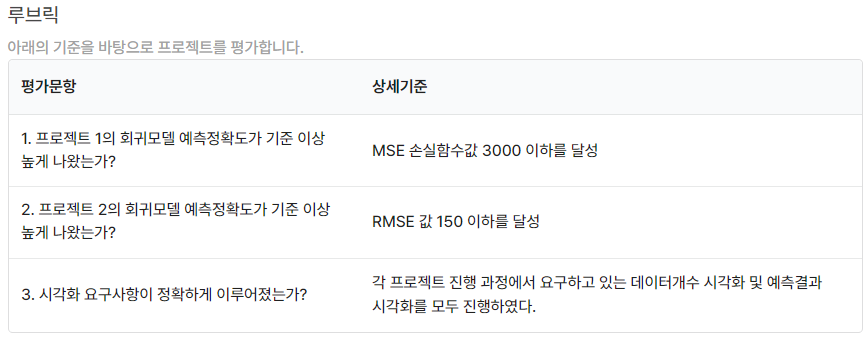

# 2-12. 프로젝트 1 : 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!  
  
첫 번째 프로젝트에서는 우리가 오늘 많은 시간을 들여서 직접 실습해 보았던 모델 설계, 손실함수 정의와 기울기 계산을 구현해 보겠습니다.
새로운 데이터로 프로젝트를 진행하지만, 과정은 모두 동일합니다. 함께 진행했던 과정과 코드를 참고하여 충분히 고민한 후 진행해 보세요.
  
데이터는 sklearn.datasets에 있는 데이터 중 하나인 당뇨병 데이터를 사용하겠습니다.  
데이터에 관한 정보를 다음 글에서 살펴보세요. 데이터에 대한 이해는 언제나 첫 번째로 해야하는 필수 과정입니다!  
  
- [회귀 (3) - 당뇨병 환자 데이터(diabetes)와 다중 선형 회귀](https://yhyun225.tistory.com/11)  
  
다음 과정을 차례대로 진행해주세요!  

In [1]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

## (1) 데이터 가져오기  
---- 
- `sklearn.datasets`의 `load_diabetes`에서 데이터를 가져와주세요.
- `diabetes`의 `data`를 `df_X`에, `target`을 `df_y`에 저장해주세요.

In [2]:
diabetes = load_diabetes()

In [3]:
print(dir(diabetes))

['DESCR', 'data', 'data_filename', 'data_module', 'feature_names', 'frame', 'target', 'target_filename']


In [4]:
df_diabetes_X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df_diabetes_y = pd.DataFrame(diabetes.target)

In [5]:
df_diabetes_X.head(10)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041180,-0.096346
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062913,-0.038357
7,0.063504,0.050680,-0.001895,0.066630,0.090620,0.108914,0.022869,0.017703,-0.035817,0.003064
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014956,0.011349
9,-0.070900,-0.044642,0.039062,-0.033214,-0.012577,-0.034508,-0.024993,-0.002592,0.067736,-0.013504


In [6]:
df_diabetes_y.head(10)

,0
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0
5,97.0
6,138.0
7,63.0
8,110.0
9,310.0


## (2) 모델에 입력할 데이터 X 준비하기  
----
- df_X에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [7]:
X_diabetes = df_diabetes_X.values
X_diabetes

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

- Dataframe에서 array로 변환시킨 데이터와 직접 load_diabetes에서 뽑아온 데이터가 같은지 확인해봅니다.

In [8]:
sample_X = diabetes.data
print(np.array_equal(X_diabetes, sample_X))

True


## (3) 모델에 예측할 데이터 y 준비하기  
----
- df_y에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [9]:
y_diabetes = df_diabetes_y.values
y_diabetes

array([[151.],
       [ 75.],
       [141.],
       [206.],
       [135.],
       [ 97.],
       [138.],
       [ 63.],
       [110.],
       [310.],
       [101.],
       [ 69.],
       [179.],
       [185.],
       [118.],
       [171.],
       [166.],
       [144.],
       [ 97.],
       [168.],
       [ 68.],
       [ 49.],
       [ 68.],
       [245.],
       [184.],
       [202.],
       [137.],
       [ 85.],
       [131.],
       [283.],
       [129.],
       [ 59.],
       [341.],
       [ 87.],
       [ 65.],
       [102.],
       [265.],
       [276.],
       [252.],
       [ 90.],
       [100.],
       [ 55.],
       [ 61.],
       [ 92.],
       [259.],
       [ 53.],
       [190.],
       [142.],
       [ 75.],
       [142.],
       [155.],
       [225.],
       [ 59.],
       [104.],
       [182.],
       [128.],
       [ 52.],
       [ 37.],
       [170.],
       [170.],
       [ 61.],
       [144.],
       [ 52.],
       [128.],
       [ 71.],
       [163.],
       [15

- 똑같이 Dataframe에서 array로 변환시킨 데이터와 직접 load_diabetes에서 뽑아온 데이터가 같은지 확인해봅니다.

In [10]:
sample_y = diabetes.target
print(np.array_equal(y_diabetes, sample_y))

False


- 뭔가 다릅니다. shape를 비교해봅니다. 
- reshape로 데이터 형태를 바꿔줍니다.  

In [11]:
print(y_diabetes.shape)
print(sample_y.shape)

(442, 1)
(442,)


In [12]:
y_re = y_diabetes.reshape(442,)
y_diabetes = y_re
print(y_diabetes.shape)

(442,)


In [13]:
y_diabetes

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [14]:
sample_y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

## (4) train 데이터와 test 데이터로 분리하기  
----
- X와 y 데이터를 각각 train 데이터와 test 데이터로 분리해주세요.

In [15]:
X_diabetes_train, X_diabetes_test, y_diabetes_train, y_diabetes_test = train_test_split(X_diabetes, 
                                                                                y_diabetes, 
                                                                                test_size=0.25, random_state=15)

In [16]:
print(X_diabetes_train.shape, y_diabetes_train.shape)
print(X_diabetes_test.shape, y_diabetes_test.shape)

(331, 10) (331,)
(111, 10) (111,)


## (5) 모델 준비하기  
----
- 입력 데이터 개수에 맞는 가중치 W와 b를 준비해주세요.
- 모델 함수를 구현해주세요.

- 반복적인 학습에서 동일한 결과가 나오도록 W, b 난수 생성을 random.seed로 고정하였다. 

In [17]:
np.random.seed(2022)
W_diabetes = np.random.rand(10)
b_diabetes = np.random.rand()

In [18]:
print(W_diabetes)
print(b_diabetes)

[0.00935861 0.49905781 0.11338369 0.04997402 0.68540759 0.48698807
 0.89765723 0.64745207 0.89696312 0.72113493]
0.8313534207761898


In [19]:
# 손실함수
def diab_model(X, W, b):
    prediction = 0
    for i in range(10):
        prediction += X[:, i] * W[i]
    prediction += b
    return prediction

In [20]:
X_sample01 = X_diabetes_train[0:2]
X_sample01

array([[ 0.00175052, -0.04464164, -0.00836158, -0.06419941, -0.03871969,
        -0.02448686,  0.00446045, -0.03949338, -0.06468302, -0.05492509],
       [ 0.0562386 ,  0.05068012,  0.02181716,  0.05630106, -0.00707277,
         0.01810133, -0.03235593, -0.00259226, -0.02364456,  0.02377494]])

In [21]:
print(diab_model(X_sample01, W_diabetes, b_diabetes))

[0.64727829 0.83164049]


## (6) 손실함수 loss 정의하기  
----
- 손실함수를 MSE 함수로 정의해주세요.

In [22]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()
    return mse

In [23]:
def loss(X, W, b, y):
    prediction = diab_model(X, W, b)
    L = MSE(prediction, y)
    return L

## (7) 기울기를 구하는 gradient 함수 구현하기  
----
- 기울기를 계산하는 gradient 함수를 구현해주세요.

In [24]:
def diab_gradient(X, W, b, y):
    N = len(W)
    
    y_pred = diab_model(X, W, b)
    
    dW = 1/N * 2 * X.T.dot(y_pred - y)
    db = 2 * (y_pred - y).mean()
    return dW, db

In [25]:
dW, db = diab_gradient(X_diabetes_train, W_diabetes, b_diabetes, y_diabetes_train)
print('dW:',dW)
print('db:',db)

dW: [ -27.53137483   -3.50314171 -163.73512039 -128.86824224  -48.93823724
  -38.63884436  107.27252806 -100.71071635 -151.40825799  -94.29298797]
db: -304.0895142198922


## (8) 하이퍼 파라미터인 학습률 설정하기  
----
- 학습률, learning rate 를 설정해주세요
- 만약 학습이 잘 되지 않는다면 learning rate 값을 한번 여러 가지로 설정하며 실험해 보세요.

- 다양한 실험을 위해 학습률을 여러가지 준비해봅니다. 

In [26]:
LEARNING_RATE01 = 1
LEARNING_RATE02 = 0.001
LEARNING_RATE03 = 0.00001
LEARNING_RATE04 = 0.0000001

## (9) 모델 학습하기  
----
- 정의된 손실함수와 기울기 함수로 모델을 학습해주세요.
- loss값이 충분히 떨어질 때까지 학습을 진행해주세요.
- 입력하는 데이터인 X에 들어가는 특성 컬럼들을 몇 개 빼도 괜찮습니다. 다양한 데이터로 실험해 보세요.

In [27]:
# (X_diabetes_train, W_diabetes, b_diabetes, y_diabetes_train)

In [28]:
def model_learning(X, W, b, y, LEARNING_RATE, epoch):
    losses = []

    for i in range(1, epoch):
        dW, db = diab_gradient(X, W, b, y)
        W -= LEARNING_RATE * dW
        b -= LEARNING_RATE * db
        L = loss(X, W, b, y)
        losses.append(L)
        if i % 1000 == 0:
            print(f'학습률{LEARNING_RATE} epoch: {i} Loss: {round(L,4)}')
    return W, b, L, losses

In [29]:
np.random.seed(2022)
W_diabetes = np.random.rand(10)
b_diabetes = np.random.rand()

print(W_diabetes)
print(b_diabetes)
# (X_diabetes_train, W_diabetes, b_diabetes, y_diabetes_train)
rate01 = model_learning(X_diabetes_train, W_diabetes, b_diabetes, y_diabetes_train, LEARNING_RATE01, epoch=200000)

[0.00935861 0.49905781 0.11338369 0.04997402 0.68540759 0.48698807
 0.89765723 0.64745207 0.89696312 0.72113493]
0.8313534207761898
학습률1 epoch: 1000 Loss: 192009.6446
학습률1 epoch: 2000 Loss: 1540707.7794
학습률1 epoch: 3000 Loss: 12511883.3991
학습률1 epoch: 4000 Loss: 101758212.6491
학습률1 epoch: 5000 Loss: 827743041.4587
학습률1 epoch: 6000 Loss: 6733352559.8909
학습률1 epoch: 7000 Loss: 54773232182.8216
학습률1 epoch: 8000 Loss: 445559319035.0798
학습률1 epoch: 9000 Loss: 3624454996459.039
학습률1 epoch: 10000 Loss: 29483558142486.31
학습률1 epoch: 11000 Loss: 239837493399254.44
학습률1 epoch: 12000 Loss: 1950986477497270.8
학습률1 epoch: 13000 Loss: 1.5870530422351298e+16
학습률1 epoch: 14000 Loss: 1.2910070817619438e+17
학습률1 epoch: 15000 Loss: 1.050184991178622e+18
학습률1 epoch: 16000 Loss: 8.54285411193594e+18
학습률1 epoch: 17000 Loss: 6.949285791631326e+19
학습률1 epoch: 18000 Loss: 5.652978779808169e+20
학습률1 epoch: 19000 Loss: 4.5984824977904485e+21
학습률1 epoch: 20000 Loss: 3.7406900160348467e+22
학습률1 epoch: 21000 Loss: 

학습률1 epoch: 176000 Loss: 3.850811100588091e+164
학습률1 epoch: 177000 Loss: 3.132487868449489e+165
학습률1 epoch: 178000 Loss: 2.5481593331038767e+166
학습률1 epoch: 179000 Loss: 2.072830369842142e+167
학습률1 epoch: 180000 Loss: 1.6861683986245368e+168
학습률1 epoch: 181000 Loss: 1.3716336415586835e+169
학습률1 epoch: 182000 Loss: 1.1157716205512187e+170
학습률1 epoch: 183000 Loss: 9.076376311482116e+170
학습률1 epoch: 184000 Loss: 7.383285739687022e+171
학습률1 epoch: 185000 Loss: 6.0060211744309795e+172
학습률1 epoch: 186000 Loss: 4.885669012349825e+173
학습률1 epoch: 187000 Loss: 3.974305285478325e+174
학습률1 epoch: 188000 Loss: 3.232945674840908e+175
학습률1 epoch: 189000 Loss: 2.6298779247439374e+176
학습률1 epoch: 190000 Loss: 2.1393053254431537e+177
학습률1 epoch: 191000 Loss: 1.7402432380639974e+178
학습률1 epoch: 192000 Loss: 1.4156214597372126e+179
학습률1 epoch: 193000 Loss: 1.151554031893815e+180
학습률1 epoch: 194000 Loss: 9.367452571798811e+180
학습률1 epoch: 195000 Loss: 7.620065168856244e+181
학습률1 epoch: 196000 Loss: 6.1986

<function matplotlib.pyplot.show(close=None, block=None)>

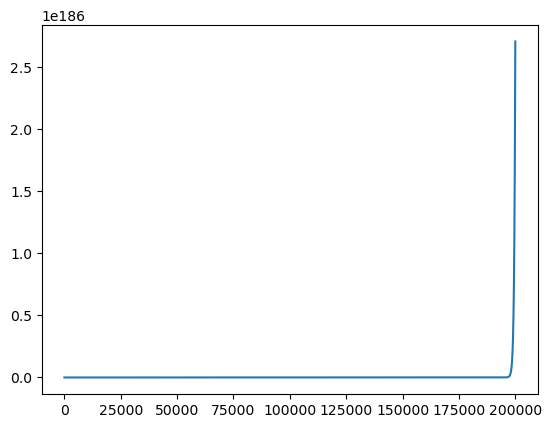

In [30]:
plt.plot(rate01[3])
plt.show

### 소결론1
- 재미있게도, 학습률이 1이면 손실값이 기하급수적으로 폭증하는 것을 알게 되었다. 

In [31]:
np.random.seed(2022)
W_diabetes = np.random.rand(10)
b_diabetes = np.random.rand()

print(W_diabetes)
print(b_diabetes)
# (X_diabetes_train, W_diabetes, b_diabetes, y_diabetes_train)
rate02 = model_learning(X_diabetes_train, W_diabetes, b_diabetes, y_diabetes_train, LEARNING_RATE02, epoch=200000)

[0.00935861 0.49905781 0.11338369 0.04997402 0.68540759 0.48698807
 0.89765723 0.64745207 0.89696312 0.72113493]
0.8313534207761898
학습률0.001 epoch: 1000 Loss: 4948.4318
학습률0.001 epoch: 2000 Loss: 3896.6959
학습률0.001 epoch: 3000 Loss: 3586.6698
학습률0.001 epoch: 4000 Loss: 3415.887
학습률0.001 epoch: 5000 Loss: 3306.8897
학습률0.001 epoch: 6000 Loss: 3232.018
학습률0.001 epoch: 7000 Loss: 3178.5432
학습률0.001 epoch: 8000 Loss: 3139.5265
학습률0.001 epoch: 9000 Loss: 3110.6851
학습률0.001 epoch: 10000 Loss: 3089.167
학습률0.001 epoch: 11000 Loss: 3072.9917
학습률0.001 epoch: 12000 Loss: 3060.7513
학습률0.001 epoch: 13000 Loss: 3051.4302
학습률0.001 epoch: 14000 Loss: 3044.2888
학습률0.001 epoch: 15000 Loss: 3038.7838
학습률0.001 epoch: 16000 Loss: 3034.5136
학습률0.001 epoch: 17000 Loss: 3031.1796
학습률0.001 epoch: 18000 Loss: 3028.5586
학습률0.001 epoch: 19000 Loss: 3026.4829
학습률0.001 epoch: 20000 Loss: 3024.8261
학습률0.001 epoch: 21000 Loss: 3023.4922
학습률0.001 epoch: 22000 Loss: 3022.4083
학습률0.001 epoch: 23000 Loss: 3021.5186
학습률0.0

<function matplotlib.pyplot.show(close=None, block=None)>

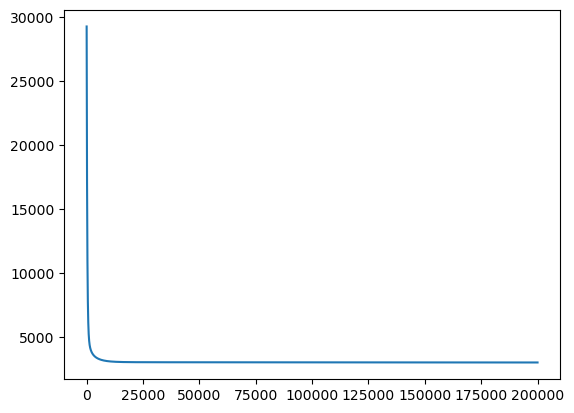

In [32]:
plt.plot(rate02[3])
plt.show

### 소결론2
- 손실값이 줄어들키 시작했다. 
- LEARNING_RATE02 = 0.001, epoch=200000
- 합격선에 턱걸이 했다

In [33]:
np.random.seed(2022)
W_diabetes = np.random.rand(10)
b_diabetes = np.random.rand()

print(W_diabetes)
print(b_diabetes)
# (X_diabetes_train, W_diabetes, b_diabetes, y_diabetes_train)
rate03 = model_learning(X_diabetes_train, W_diabetes, b_diabetes, y_diabetes_train, LEARNING_RATE03, epoch=200000)

[0.00935861 0.49905781 0.11338369 0.04997402 0.68540759 0.48698807
 0.89765723 0.64745207 0.89696312 0.72113493]
0.8313534207761898
학습률1e-05 epoch: 1000 Loss: 28423.1137
학습률1e-05 epoch: 2000 Loss: 27522.2486
학습률1e-05 epoch: 3000 Loss: 26656.0055
학습률1e-05 epoch: 4000 Loss: 25823.0334
학습률1e-05 epoch: 5000 Loss: 25022.0343
학습률1e-05 epoch: 6000 Loss: 24251.7608
학습률1e-05 epoch: 7000 Loss: 23511.0145
학습률1e-05 epoch: 8000 Loss: 22798.644
학습률1e-05 epoch: 9000 Loss: 22113.5428
학습률1e-05 epoch: 10000 Loss: 21454.6479
학습률1e-05 epoch: 11000 Loss: 20820.9379
학습률1e-05 epoch: 12000 Loss: 20211.4313
학습률1e-05 epoch: 13000 Loss: 19625.185
학습률1e-05 epoch: 14000 Loss: 19061.2931
학습률1e-05 epoch: 15000 Loss: 18518.8849
학습률1e-05 epoch: 16000 Loss: 17997.1239
학습률1e-05 epoch: 17000 Loss: 17495.2062
학습률1e-05 epoch: 18000 Loss: 17012.3597
학습률1e-05 epoch: 19000 Loss: 16547.8421
학습률1e-05 epoch: 20000 Loss: 16100.9406
학습률1e-05 epoch: 21000 Loss: 15670.9698
학습률1e-05 epoch: 22000 Loss: 15257.2715
학습률1e-05 epoch: 23000

<function matplotlib.pyplot.show(close=None, block=None)>

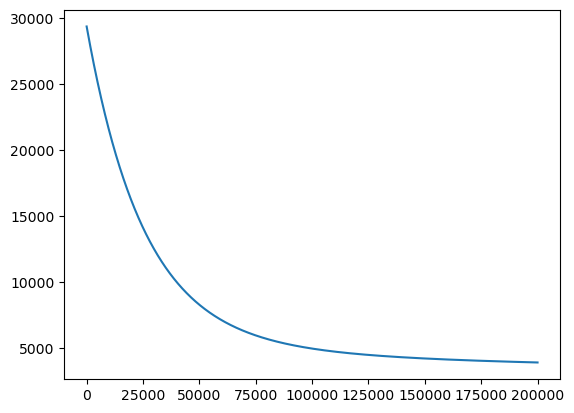

In [34]:
plt.plot(rate03[3])
plt.show

### 소결론3
- 손실값이 줄어들지만 아직 합격선을 통과하지 못한것 같다. 
- 에포크 수가 모자란게 아닐까 하는 생각이 든다.
- LEARNING_RATE02 = 0.00001, epoch=200000
- 합격선에 도달 못했다. 
- 다시한번 epoch=2000000로 해서 시도해본다. 

In [35]:
np.random.seed(2022)
W_diabetes = np.random.rand(10)
b_diabetes = np.random.rand()

print(W_diabetes)
print(b_diabetes)
# (X_diabetes_train, W_diabetes, b_diabetes, y_diabetes_train)
rate03_1 = model_learning(X_diabetes_train, W_diabetes, b_diabetes, y_diabetes_train, LEARNING_RATE03, epoch=2000000)

[0.00935861 0.49905781 0.11338369 0.04997402 0.68540759 0.48698807
 0.89765723 0.64745207 0.89696312 0.72113493]
0.8313534207761898
학습률1e-05 epoch: 1000 Loss: 28423.1137
학습률1e-05 epoch: 2000 Loss: 27522.2486
학습률1e-05 epoch: 3000 Loss: 26656.0055
학습률1e-05 epoch: 4000 Loss: 25823.0334
학습률1e-05 epoch: 5000 Loss: 25022.0343
학습률1e-05 epoch: 6000 Loss: 24251.7608
학습률1e-05 epoch: 7000 Loss: 23511.0145
학습률1e-05 epoch: 8000 Loss: 22798.644
학습률1e-05 epoch: 9000 Loss: 22113.5428
학습률1e-05 epoch: 10000 Loss: 21454.6479
학습률1e-05 epoch: 11000 Loss: 20820.9379
학습률1e-05 epoch: 12000 Loss: 20211.4313
학습률1e-05 epoch: 13000 Loss: 19625.185
학습률1e-05 epoch: 14000 Loss: 19061.2931
학습률1e-05 epoch: 15000 Loss: 18518.8849
학습률1e-05 epoch: 16000 Loss: 17997.1239
학습률1e-05 epoch: 17000 Loss: 17495.2062
학습률1e-05 epoch: 18000 Loss: 17012.3597
학습률1e-05 epoch: 19000 Loss: 16547.8421
학습률1e-05 epoch: 20000 Loss: 16100.9406
학습률1e-05 epoch: 21000 Loss: 15670.9698
학습률1e-05 epoch: 22000 Loss: 15257.2715
학습률1e-05 epoch: 23000

학습률1e-05 epoch: 211000 Loss: 3850.1517
학습률1e-05 epoch: 212000 Loss: 3846.126
학습률1e-05 epoch: 213000 Loss: 3842.135
학습률1e-05 epoch: 214000 Loss: 3838.1782
학습률1e-05 epoch: 215000 Loss: 3834.2551
학습률1e-05 epoch: 216000 Loss: 3830.3652
학습률1e-05 epoch: 217000 Loss: 3826.5079
학습률1e-05 epoch: 218000 Loss: 3822.6826
학습률1e-05 epoch: 219000 Loss: 3818.889
학습률1e-05 epoch: 220000 Loss: 3815.1266
학습률1e-05 epoch: 221000 Loss: 3811.3947
학습률1e-05 epoch: 222000 Loss: 3807.6932
학습률1e-05 epoch: 223000 Loss: 3804.0213
학습률1e-05 epoch: 224000 Loss: 3800.3788
학습률1e-05 epoch: 225000 Loss: 3796.7652
학습률1e-05 epoch: 226000 Loss: 3793.1801
학습률1e-05 epoch: 227000 Loss: 3789.623
학습률1e-05 epoch: 228000 Loss: 3786.0937
학습률1e-05 epoch: 229000 Loss: 3782.5916
학습률1e-05 epoch: 230000 Loss: 3779.1165
학습률1e-05 epoch: 231000 Loss: 3775.6679
학습률1e-05 epoch: 232000 Loss: 3772.2455
학습률1e-05 epoch: 233000 Loss: 3768.8489
학습률1e-05 epoch: 234000 Loss: 3765.4778
학습률1e-05 epoch: 235000 Loss: 3762.1319
학습률1e-05 epoch: 236000 Loss: 

학습률1e-05 epoch: 423000 Loss: 3386.7924
학습률1e-05 epoch: 424000 Loss: 3385.5887
학습률1e-05 epoch: 425000 Loss: 3384.39
학습률1e-05 epoch: 426000 Loss: 3383.1963
학습률1e-05 epoch: 427000 Loss: 3382.0076
학습률1e-05 epoch: 428000 Loss: 3380.8239
학습률1e-05 epoch: 429000 Loss: 3379.6451
학습률1e-05 epoch: 430000 Loss: 3378.4712
학습률1e-05 epoch: 431000 Loss: 3377.3021
학습률1e-05 epoch: 432000 Loss: 3376.1379
학습률1e-05 epoch: 433000 Loss: 3374.9785
학습률1e-05 epoch: 434000 Loss: 3373.8239
학습률1e-05 epoch: 435000 Loss: 3372.674
학습률1e-05 epoch: 436000 Loss: 3371.5289
학습률1e-05 epoch: 437000 Loss: 3370.3884
학습률1e-05 epoch: 438000 Loss: 3369.2526
학습률1e-05 epoch: 439000 Loss: 3368.1214
학습률1e-05 epoch: 440000 Loss: 3366.9949
학습률1e-05 epoch: 441000 Loss: 3365.8729
학습률1e-05 epoch: 442000 Loss: 3364.7555
학습률1e-05 epoch: 443000 Loss: 3363.6426
학습률1e-05 epoch: 444000 Loss: 3362.5342
학습률1e-05 epoch: 445000 Loss: 3361.4303
학습률1e-05 epoch: 446000 Loss: 3360.3309
학습률1e-05 epoch: 447000 Loss: 3359.2358
학습률1e-05 epoch: 448000 Loss:

학습률1e-05 epoch: 637000 Loss: 3210.2161
학습률1e-05 epoch: 638000 Loss: 3209.6621
학습률1e-05 epoch: 639000 Loss: 3209.1098
학습률1e-05 epoch: 640000 Loss: 3208.5594
학습률1e-05 epoch: 641000 Loss: 3208.0107
학습률1e-05 epoch: 642000 Loss: 3207.4638
학습률1e-05 epoch: 643000 Loss: 3206.9187
학습률1e-05 epoch: 644000 Loss: 3206.3753
학습률1e-05 epoch: 645000 Loss: 3205.8337
학습률1e-05 epoch: 646000 Loss: 3205.2939
학습률1e-05 epoch: 647000 Loss: 3204.7558
학습률1e-05 epoch: 648000 Loss: 3204.2194
학습률1e-05 epoch: 649000 Loss: 3203.6848
학습률1e-05 epoch: 650000 Loss: 3203.1519
학습률1e-05 epoch: 651000 Loss: 3202.6207
학습률1e-05 epoch: 652000 Loss: 3202.0912
학습률1e-05 epoch: 653000 Loss: 3201.5634
학습률1e-05 epoch: 654000 Loss: 3201.0374
학습률1e-05 epoch: 655000 Loss: 3200.513
학습률1e-05 epoch: 656000 Loss: 3199.9903
학습률1e-05 epoch: 657000 Loss: 3199.4693
학습률1e-05 epoch: 658000 Loss: 3198.9499
학습률1e-05 epoch: 659000 Loss: 3198.4323
학습률1e-05 epoch: 660000 Loss: 3197.9162
학습률1e-05 epoch: 661000 Loss: 3197.4019
학습률1e-05 epoch: 662000 Los

학습률1e-05 epoch: 850000 Loss: 3124.0552
학습률1e-05 epoch: 851000 Loss: 3123.7684
학습률1e-05 epoch: 852000 Loss: 3123.4824
학습률1e-05 epoch: 853000 Loss: 3123.1972
학습률1e-05 epoch: 854000 Loss: 3122.9129
학습률1e-05 epoch: 855000 Loss: 3122.6294
학습률1e-05 epoch: 856000 Loss: 3122.3468
학습률1e-05 epoch: 857000 Loss: 3122.065
학습률1e-05 epoch: 858000 Loss: 3121.784
학습률1e-05 epoch: 859000 Loss: 3121.5039
학습률1e-05 epoch: 860000 Loss: 3121.2245
학습률1e-05 epoch: 861000 Loss: 3120.9461
학습률1e-05 epoch: 862000 Loss: 3120.6684
학습률1e-05 epoch: 863000 Loss: 3120.3916
학습률1e-05 epoch: 864000 Loss: 3120.1155
학습률1e-05 epoch: 865000 Loss: 3119.8403
학습률1e-05 epoch: 866000 Loss: 3119.5659
학습률1e-05 epoch: 867000 Loss: 3119.2923
학습률1e-05 epoch: 868000 Loss: 3119.0195
학습률1e-05 epoch: 869000 Loss: 3118.7476
학습률1e-05 epoch: 870000 Loss: 3118.4764
학습률1e-05 epoch: 871000 Loss: 3118.206
학습률1e-05 epoch: 872000 Loss: 3117.9364
학습률1e-05 epoch: 873000 Loss: 3117.6676
학습률1e-05 epoch: 874000 Loss: 3117.3996
학습률1e-05 epoch: 875000 Loss:

학습률1e-05 epoch: 1061000 Loss: 3078.7762
학습률1e-05 epoch: 1062000 Loss: 3078.6201
학습률1e-05 epoch: 1063000 Loss: 3078.4645
학습률1e-05 epoch: 1064000 Loss: 3078.3093
학습률1e-05 epoch: 1065000 Loss: 3078.1545
학습률1e-05 epoch: 1066000 Loss: 3078.0002
학습률1e-05 epoch: 1067000 Loss: 3077.8463
학습률1e-05 epoch: 1068000 Loss: 3077.6928
학습률1e-05 epoch: 1069000 Loss: 3077.5398
학습률1e-05 epoch: 1070000 Loss: 3077.3872
학습률1e-05 epoch: 1071000 Loss: 3077.235
학습률1e-05 epoch: 1072000 Loss: 3077.0833
학습률1e-05 epoch: 1073000 Loss: 3076.932
학습률1e-05 epoch: 1074000 Loss: 3076.7811
학습률1e-05 epoch: 1075000 Loss: 3076.6306
학습률1e-05 epoch: 1076000 Loss: 3076.4806
학습률1e-05 epoch: 1077000 Loss: 3076.3309
학습률1e-05 epoch: 1078000 Loss: 3076.1817
학습률1e-05 epoch: 1079000 Loss: 3076.0329
학습률1e-05 epoch: 1080000 Loss: 3075.8845
학습률1e-05 epoch: 1081000 Loss: 3075.7365
학습률1e-05 epoch: 1082000 Loss: 3075.589
학습률1e-05 epoch: 1083000 Loss: 3075.4419
학습률1e-05 epoch: 1084000 Loss: 3075.2951
학습률1e-05 epoch: 1085000 Loss: 3075.1488
학습률

학습률1e-05 epoch: 1268000 Loss: 3054.1524
학습률1e-05 epoch: 1269000 Loss: 3054.064
학습률1e-05 epoch: 1270000 Loss: 3053.9758
학습률1e-05 epoch: 1271000 Loss: 3053.8879
학습률1e-05 epoch: 1272000 Loss: 3053.8002
학습률1e-05 epoch: 1273000 Loss: 3053.7127
학습률1e-05 epoch: 1274000 Loss: 3053.6255
학습률1e-05 epoch: 1275000 Loss: 3053.5385
학습률1e-05 epoch: 1276000 Loss: 3053.4517
학습률1e-05 epoch: 1277000 Loss: 3053.3652
학습률1e-05 epoch: 1278000 Loss: 3053.2788
학습률1e-05 epoch: 1279000 Loss: 3053.1928
학습률1e-05 epoch: 1280000 Loss: 3053.1069
학습률1e-05 epoch: 1281000 Loss: 3053.0213
학습률1e-05 epoch: 1282000 Loss: 3052.9359
학습률1e-05 epoch: 1283000 Loss: 3052.8507
학습률1e-05 epoch: 1284000 Loss: 3052.7658
학습률1e-05 epoch: 1285000 Loss: 3052.6811
학습률1e-05 epoch: 1286000 Loss: 3052.5966
학습률1e-05 epoch: 1287000 Loss: 3052.5124
학습률1e-05 epoch: 1288000 Loss: 3052.4283
학습률1e-05 epoch: 1289000 Loss: 3052.3445
학습률1e-05 epoch: 1290000 Loss: 3052.2609
학습률1e-05 epoch: 1291000 Loss: 3052.1776
학습률1e-05 epoch: 1292000 Loss: 3052.0944
학

학습률1e-05 epoch: 1476000 Loss: 3039.984
학습률1e-05 epoch: 1477000 Loss: 3039.9327
학습률1e-05 epoch: 1478000 Loss: 3039.8815
학습률1e-05 epoch: 1479000 Loss: 3039.8305
학습률1e-05 epoch: 1480000 Loss: 3039.7796
학습률1e-05 epoch: 1481000 Loss: 3039.7288
학습률1e-05 epoch: 1482000 Loss: 3039.6782
학습률1e-05 epoch: 1483000 Loss: 3039.6277
학습률1e-05 epoch: 1484000 Loss: 3039.5773
학습률1e-05 epoch: 1485000 Loss: 3039.527
학습률1e-05 epoch: 1486000 Loss: 3039.4769
학습률1e-05 epoch: 1487000 Loss: 3039.4269
학습률1e-05 epoch: 1488000 Loss: 3039.377
학습률1e-05 epoch: 1489000 Loss: 3039.3273
학습률1e-05 epoch: 1490000 Loss: 3039.2777
학습률1e-05 epoch: 1491000 Loss: 3039.2282
학습률1e-05 epoch: 1492000 Loss: 3039.1788
학습률1e-05 epoch: 1493000 Loss: 3039.1296
학습률1e-05 epoch: 1494000 Loss: 3039.0804
학습률1e-05 epoch: 1495000 Loss: 3039.0314
학습률1e-05 epoch: 1496000 Loss: 3038.9826
학습률1e-05 epoch: 1497000 Loss: 3038.9338
학습률1e-05 epoch: 1498000 Loss: 3038.8852
학습률1e-05 epoch: 1499000 Loss: 3038.8367
학습률1e-05 epoch: 1500000 Loss: 3038.7883
학습률

학습률1e-05 epoch: 1682000 Loss: 3031.7245
학습률1e-05 epoch: 1683000 Loss: 3031.6938
학습률1e-05 epoch: 1684000 Loss: 3031.6631
학습률1e-05 epoch: 1685000 Loss: 3031.6325
학습률1e-05 epoch: 1686000 Loss: 3031.602
학습률1e-05 epoch: 1687000 Loss: 3031.5716
학습률1e-05 epoch: 1688000 Loss: 3031.5412
학습률1e-05 epoch: 1689000 Loss: 3031.5109
학습률1e-05 epoch: 1690000 Loss: 3031.4807
학습률1e-05 epoch: 1691000 Loss: 3031.4506
학습률1e-05 epoch: 1692000 Loss: 3031.4205
학습률1e-05 epoch: 1693000 Loss: 3031.3905
학습률1e-05 epoch: 1694000 Loss: 3031.3606
학습률1e-05 epoch: 1695000 Loss: 3031.3307
학습률1e-05 epoch: 1696000 Loss: 3031.3009
학습률1e-05 epoch: 1697000 Loss: 3031.2712
학습률1e-05 epoch: 1698000 Loss: 3031.2416
학습률1e-05 epoch: 1699000 Loss: 3031.212
학습률1e-05 epoch: 1700000 Loss: 3031.1825
학습률1e-05 epoch: 1701000 Loss: 3031.1531
학습률1e-05 epoch: 1702000 Loss: 3031.1238
학습률1e-05 epoch: 1703000 Loss: 3031.0945
학습률1e-05 epoch: 1704000 Loss: 3031.0653
학습률1e-05 epoch: 1705000 Loss: 3031.0361
학습률1e-05 epoch: 1706000 Loss: 3031.007
학습률

학습률1e-05 epoch: 1889000 Loss: 3026.6908
학습률1e-05 epoch: 1890000 Loss: 3026.6718
학습률1e-05 epoch: 1891000 Loss: 3026.6529
학습률1e-05 epoch: 1892000 Loss: 3026.6341
학습률1e-05 epoch: 1893000 Loss: 3026.6153
학습률1e-05 epoch: 1894000 Loss: 3026.5965
학습률1e-05 epoch: 1895000 Loss: 3026.5778
학습률1e-05 epoch: 1896000 Loss: 3026.5592
학습률1e-05 epoch: 1897000 Loss: 3026.5405
학습률1e-05 epoch: 1898000 Loss: 3026.5219
학습률1e-05 epoch: 1899000 Loss: 3026.5034
학습률1e-05 epoch: 1900000 Loss: 3026.4849
학습률1e-05 epoch: 1901000 Loss: 3026.4664
학습률1e-05 epoch: 1902000 Loss: 3026.448
학습률1e-05 epoch: 1903000 Loss: 3026.4296
학습률1e-05 epoch: 1904000 Loss: 3026.4113
학습률1e-05 epoch: 1905000 Loss: 3026.393
학습률1e-05 epoch: 1906000 Loss: 3026.3747
학습률1e-05 epoch: 1907000 Loss: 3026.3565
학습률1e-05 epoch: 1908000 Loss: 3026.3383
학습률1e-05 epoch: 1909000 Loss: 3026.3202
학습률1e-05 epoch: 1910000 Loss: 3026.3021
학습률1e-05 epoch: 1911000 Loss: 3026.2841
학습률1e-05 epoch: 1912000 Loss: 3026.266
학습률1e-05 epoch: 1913000 Loss: 3026.2481
학습률

<function matplotlib.pyplot.show(close=None, block=None)>

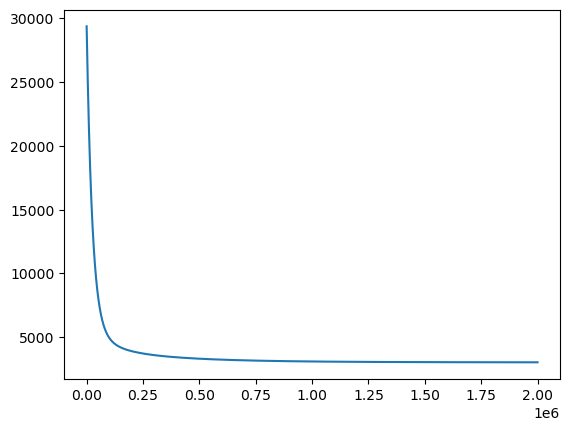

In [36]:
plt.plot(rate03_1[3])
plt.show

### 소결론3-1
- 에폭을 10배 늘렸지만 합격선을 통과하지 못했다. 
- 효과적인 하이퍼 파라미터는 아닌듯 하다
- LEARNING_RATE02 = 0.00001, epoch=2000000
- 합격선에 도달 못했다.

In [37]:
np.random.seed(2022)
W_diabetes = np.random.rand(10)
b_diabetes = np.random.rand()

print(W_diabetes)
print(b_diabetes)
# (X_diabetes_train, W_diabetes, b_diabetes, y_diabetes_train)
rate04 = model_learning(X_diabetes_train, W_diabetes, b_diabetes, y_diabetes_train, LEARNING_RATE04, epoch=200000)

[0.00935861 0.49905781 0.11338369 0.04997402 0.68540759 0.48698807
 0.89765723 0.64745207 0.89696312 0.72113493]
0.8313534207761898
학습률1e-07 epoch: 1000 Loss: 29350.4552
학습률1e-07 epoch: 2000 Loss: 29340.907
학습률1e-07 epoch: 3000 Loss: 29331.3626
학습률1e-07 epoch: 4000 Loss: 29321.8219
학습률1e-07 epoch: 5000 Loss: 29312.2849
학습률1e-07 epoch: 6000 Loss: 29302.7517
학습률1e-07 epoch: 7000 Loss: 29293.2222
학습률1e-07 epoch: 8000 Loss: 29283.6965
학습률1e-07 epoch: 9000 Loss: 29274.1745
학습률1e-07 epoch: 10000 Loss: 29264.6562
학습률1e-07 epoch: 11000 Loss: 29255.1417
학습률1e-07 epoch: 12000 Loss: 29245.6309
학습률1e-07 epoch: 13000 Loss: 29236.1238
학습률1e-07 epoch: 14000 Loss: 29226.6205
학습률1e-07 epoch: 15000 Loss: 29217.1209
학습률1e-07 epoch: 16000 Loss: 29207.625
학습률1e-07 epoch: 17000 Loss: 29198.1328
학습률1e-07 epoch: 18000 Loss: 29188.6444
학습률1e-07 epoch: 19000 Loss: 29179.1597
학습률1e-07 epoch: 20000 Loss: 29169.6787
학습률1e-07 epoch: 21000 Loss: 29160.2014
학습률1e-07 epoch: 22000 Loss: 29150.7278
학습률1e-07 epoch: 23000

<function matplotlib.pyplot.show(close=None, block=None)>

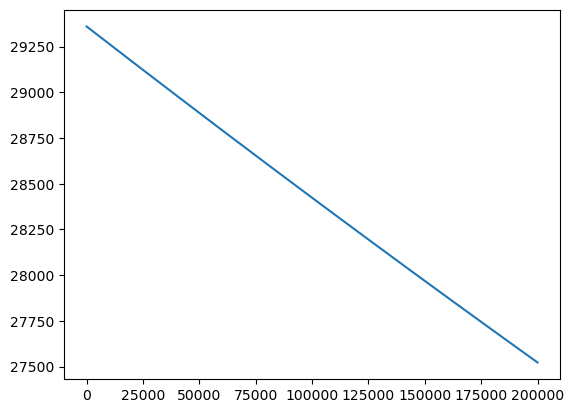

In [38]:
plt.plot(rate04[3])
plt.show

### 소결론4
- 손실함수 값이 꾸준히 줄어들고 있지만 충분히 줄어들지 못했다. 반복이 모자란듯 하다 에폭 수를 조절하려한다
- LEARNING_RATE02 = 0.0000001, epoch=2000000
- 합격선에 도달 못했다.

In [39]:
np.random.seed(2022)
W_diabetes = np.random.rand(10)
b_diabetes = np.random.rand()

print(W_diabetes)
print(b_diabetes)
# (X_diabetes_train, W_diabetes, b_diabetes, y_diabetes_train)
rate04_1 = model_learning(X_diabetes_train, W_diabetes, b_diabetes, y_diabetes_train, LEARNING_RATE04, epoch=4000000)

[0.00935861 0.49905781 0.11338369 0.04997402 0.68540759 0.48698807
 0.89765723 0.64745207 0.89696312 0.72113493]
0.8313534207761898
학습률1e-07 epoch: 1000 Loss: 29350.4552
학습률1e-07 epoch: 2000 Loss: 29340.907
학습률1e-07 epoch: 3000 Loss: 29331.3626
학습률1e-07 epoch: 4000 Loss: 29321.8219
학습률1e-07 epoch: 5000 Loss: 29312.2849
학습률1e-07 epoch: 6000 Loss: 29302.7517
학습률1e-07 epoch: 7000 Loss: 29293.2222
학습률1e-07 epoch: 8000 Loss: 29283.6965
학습률1e-07 epoch: 9000 Loss: 29274.1745
학습률1e-07 epoch: 10000 Loss: 29264.6562
학습률1e-07 epoch: 11000 Loss: 29255.1417
학습률1e-07 epoch: 12000 Loss: 29245.6309
학습률1e-07 epoch: 13000 Loss: 29236.1238
학습률1e-07 epoch: 14000 Loss: 29226.6205
학습률1e-07 epoch: 15000 Loss: 29217.1209
학습률1e-07 epoch: 16000 Loss: 29207.625
학습률1e-07 epoch: 17000 Loss: 29198.1328
학습률1e-07 epoch: 18000 Loss: 29188.6444
학습률1e-07 epoch: 19000 Loss: 29179.1597
학습률1e-07 epoch: 20000 Loss: 29169.6787
학습률1e-07 epoch: 21000 Loss: 29160.2014
학습률1e-07 epoch: 22000 Loss: 29150.7278
학습률1e-07 epoch: 23000

학습률1e-07 epoch: 210000 Loss: 27434.1069
학습률1e-07 epoch: 211000 Loss: 27425.31
학습률1e-07 epoch: 212000 Loss: 27416.5165
학습률1e-07 epoch: 213000 Loss: 27407.7265
학습률1e-07 epoch: 214000 Loss: 27398.94
학습률1e-07 epoch: 215000 Loss: 27390.1569
학습률1e-07 epoch: 216000 Loss: 27381.3772
학습률1e-07 epoch: 217000 Loss: 27372.601
학습률1e-07 epoch: 218000 Loss: 27363.8282
학습률1e-07 epoch: 219000 Loss: 27355.0588
학습률1e-07 epoch: 220000 Loss: 27346.2929
학습률1e-07 epoch: 221000 Loss: 27337.5304
학습률1e-07 epoch: 222000 Loss: 27328.7713
학습률1e-07 epoch: 223000 Loss: 27320.0157
학습률1e-07 epoch: 224000 Loss: 27311.2635
학습률1e-07 epoch: 225000 Loss: 27302.5147
학습률1e-07 epoch: 226000 Loss: 27293.7694
학습률1e-07 epoch: 227000 Loss: 27285.0275
학습률1e-07 epoch: 228000 Loss: 27276.289
학습률1e-07 epoch: 229000 Loss: 27267.5539
학습률1e-07 epoch: 230000 Loss: 27258.8223
학습률1e-07 epoch: 231000 Loss: 27250.0941
학습률1e-07 epoch: 232000 Loss: 27241.3693
학습률1e-07 epoch: 233000 Loss: 27232.6479
학습률1e-07 epoch: 234000 Loss: 27223.9299
학습률1e-

학습률1e-07 epoch: 416000 Loss: 25692.7907
학습률1e-07 epoch: 417000 Loss: 25684.6756
학습률1e-07 epoch: 418000 Loss: 25676.5637
학습률1e-07 epoch: 419000 Loss: 25668.4549
학습률1e-07 epoch: 420000 Loss: 25660.3493
학습률1e-07 epoch: 421000 Loss: 25652.2469
학습률1e-07 epoch: 422000 Loss: 25644.1477
학습률1e-07 epoch: 423000 Loss: 25636.0517
학습률1e-07 epoch: 424000 Loss: 25627.9588
학습률1e-07 epoch: 425000 Loss: 25619.869
학습률1e-07 epoch: 426000 Loss: 25611.7825
학습률1e-07 epoch: 427000 Loss: 25603.6991
학습률1e-07 epoch: 428000 Loss: 25595.6188
학습률1e-07 epoch: 429000 Loss: 25587.5418
학습률1e-07 epoch: 430000 Loss: 25579.4678
학습률1e-07 epoch: 431000 Loss: 25571.3971
학습률1e-07 epoch: 432000 Loss: 25563.3295
학습률1e-07 epoch: 433000 Loss: 25555.265
학습률1e-07 epoch: 434000 Loss: 25547.2038
학습률1e-07 epoch: 435000 Loss: 25539.1456
학습률1e-07 epoch: 436000 Loss: 25531.0907
학습률1e-07 epoch: 437000 Loss: 25523.0388
학습률1e-07 epoch: 438000 Loss: 25514.9901
학습률1e-07 epoch: 439000 Loss: 25506.9446
학습률1e-07 epoch: 440000 Loss: 25498.9022
학습

학습률1e-07 epoch: 624000 Loss: 24071.3781
학습률1e-07 epoch: 625000 Loss: 24063.897
학습률1e-07 epoch: 626000 Loss: 24056.4189
학습률1e-07 epoch: 627000 Loss: 24048.9436
학습률1e-07 epoch: 628000 Loss: 24041.4713
학습률1e-07 epoch: 629000 Loss: 24034.0018
학습률1e-07 epoch: 630000 Loss: 24026.5353
학습률1e-07 epoch: 631000 Loss: 24019.0718
학습률1e-07 epoch: 632000 Loss: 24011.6111
학습률1e-07 epoch: 633000 Loss: 24004.1533
학습률1e-07 epoch: 634000 Loss: 23996.6985
학습률1e-07 epoch: 635000 Loss: 23989.2466
학습률1e-07 epoch: 636000 Loss: 23981.7975
학습률1e-07 epoch: 637000 Loss: 23974.3514
학습률1e-07 epoch: 638000 Loss: 23966.9082
학습률1e-07 epoch: 639000 Loss: 23959.468
학습률1e-07 epoch: 640000 Loss: 23952.0306
학습률1e-07 epoch: 641000 Loss: 23944.5961
학습률1e-07 epoch: 642000 Loss: 23937.1645
학습률1e-07 epoch: 643000 Loss: 23929.7359
학습률1e-07 epoch: 644000 Loss: 23922.3101
학습률1e-07 epoch: 645000 Loss: 23914.8872
학습률1e-07 epoch: 646000 Loss: 23907.4673
학습률1e-07 epoch: 647000 Loss: 23900.0502
학습률1e-07 epoch: 648000 Loss: 23892.636
학습률

학습률1e-07 epoch: 834000 Loss: 22562.7597
학습률1e-07 epoch: 835000 Loss: 22555.8676
학습률1e-07 epoch: 836000 Loss: 22548.9782
학습률1e-07 epoch: 837000 Loss: 22542.0915
학습률1e-07 epoch: 838000 Loss: 22535.2075
학습률1e-07 epoch: 839000 Loss: 22528.3261
학습률1e-07 epoch: 840000 Loss: 22521.4475
학습률1e-07 epoch: 841000 Loss: 22514.5715
학습률1e-07 epoch: 842000 Loss: 22507.6983
학습률1e-07 epoch: 843000 Loss: 22500.8277
학습률1e-07 epoch: 844000 Loss: 22493.9597
학습률1e-07 epoch: 845000 Loss: 22487.0945
학습률1e-07 epoch: 846000 Loss: 22480.2319
학습률1e-07 epoch: 847000 Loss: 22473.372
학습률1e-07 epoch: 848000 Loss: 22466.5148
학습률1e-07 epoch: 849000 Loss: 22459.6603
학습률1e-07 epoch: 850000 Loss: 22452.8084
학습률1e-07 epoch: 851000 Loss: 22445.9592
학습률1e-07 epoch: 852000 Loss: 22439.1127
학습률1e-07 epoch: 853000 Loss: 22432.2689
학습률1e-07 epoch: 854000 Loss: 22425.4277
학습률1e-07 epoch: 855000 Loss: 22418.5892
학습률1e-07 epoch: 856000 Loss: 22411.7534
학습률1e-07 epoch: 857000 Loss: 22404.9202
학습률1e-07 epoch: 858000 Loss: 22398.0897
학

학습률1e-07 epoch: 1042000 Loss: 21185.5435
학습률1e-07 epoch: 1043000 Loss: 21179.1883
학습률1e-07 epoch: 1044000 Loss: 21172.8356
학습률1e-07 epoch: 1045000 Loss: 21166.4854
학습률1e-07 epoch: 1046000 Loss: 21160.1376
학습률1e-07 epoch: 1047000 Loss: 21153.7923
학습률1e-07 epoch: 1048000 Loss: 21147.4495
학습률1e-07 epoch: 1049000 Loss: 21141.1091
학습률1e-07 epoch: 1050000 Loss: 21134.7712
학습률1e-07 epoch: 1051000 Loss: 21128.4358
학습률1e-07 epoch: 1052000 Loss: 21122.1028
학습률1e-07 epoch: 1053000 Loss: 21115.7724
학습률1e-07 epoch: 1054000 Loss: 21109.4443
학습률1e-07 epoch: 1055000 Loss: 21103.1188
학습률1e-07 epoch: 1056000 Loss: 21096.7957
학습률1e-07 epoch: 1057000 Loss: 21090.4751
학습률1e-07 epoch: 1058000 Loss: 21084.1569
학습률1e-07 epoch: 1059000 Loss: 21077.8412
학습률1e-07 epoch: 1060000 Loss: 21071.5279
학습률1e-07 epoch: 1061000 Loss: 21065.2171
학습률1e-07 epoch: 1062000 Loss: 21058.9088
학습률1e-07 epoch: 1063000 Loss: 21052.6029
학습률1e-07 epoch: 1064000 Loss: 21046.2995
학습률1e-07 epoch: 1065000 Loss: 21039.9985
학습률1e-07 epoch: 

학습률1e-07 epoch: 1247000 Loss: 19933.125
학습률1e-07 epoch: 1248000 Loss: 19927.2573
학습률1e-07 epoch: 1249000 Loss: 19921.3918
학습률1e-07 epoch: 1250000 Loss: 19915.5286
학습률1e-07 epoch: 1251000 Loss: 19909.6677
학습률1e-07 epoch: 1252000 Loss: 19903.809
학습률1e-07 epoch: 1253000 Loss: 19897.9527
학습률1e-07 epoch: 1254000 Loss: 19892.0986
학습률1e-07 epoch: 1255000 Loss: 19886.2468
학습률1e-07 epoch: 1256000 Loss: 19880.3973
학습률1e-07 epoch: 1257000 Loss: 19874.55
학습률1e-07 epoch: 1258000 Loss: 19868.705
학습률1e-07 epoch: 1259000 Loss: 19862.8623
학습률1e-07 epoch: 1260000 Loss: 19857.0219
학습률1e-07 epoch: 1261000 Loss: 19851.1837
학습률1e-07 epoch: 1262000 Loss: 19845.3478
학습률1e-07 epoch: 1263000 Loss: 19839.5142
학습률1e-07 epoch: 1264000 Loss: 19833.6828
학습률1e-07 epoch: 1265000 Loss: 19827.8537
학습률1e-07 epoch: 1266000 Loss: 19822.0269
학습률1e-07 epoch: 1267000 Loss: 19816.2024
학습률1e-07 epoch: 1268000 Loss: 19810.3801
학습률1e-07 epoch: 1269000 Loss: 19804.56
학습률1e-07 epoch: 1270000 Loss: 19798.7423
학습률1e-07 epoch: 1271000

학습률1e-07 epoch: 1451000 Loss: 18782.1095
학습률1e-07 epoch: 1452000 Loss: 18776.689
학습률1e-07 epoch: 1453000 Loss: 18771.2705
학습률1e-07 epoch: 1454000 Loss: 18765.8542
학습률1e-07 epoch: 1455000 Loss: 18760.4399
학습률1e-07 epoch: 1456000 Loss: 18755.0278
학습률1e-07 epoch: 1457000 Loss: 18749.6177
학습률1e-07 epoch: 1458000 Loss: 18744.2098
학습률1e-07 epoch: 1459000 Loss: 18738.804
학습률1e-07 epoch: 1460000 Loss: 18733.4002
학습률1e-07 epoch: 1461000 Loss: 18727.9986
학습률1e-07 epoch: 1462000 Loss: 18722.599
학습률1e-07 epoch: 1463000 Loss: 18717.2016
학습률1e-07 epoch: 1464000 Loss: 18711.8062
학습률1e-07 epoch: 1465000 Loss: 18706.4129
학습률1e-07 epoch: 1466000 Loss: 18701.0218
학습률1e-07 epoch: 1467000 Loss: 18695.6327
학습률1e-07 epoch: 1468000 Loss: 18690.2457
학습률1e-07 epoch: 1469000 Loss: 18684.8608
학습률1e-07 epoch: 1470000 Loss: 18679.478
학습률1e-07 epoch: 1471000 Loss: 18674.0973
학습률1e-07 epoch: 1472000 Loss: 18668.7186
학습률1e-07 epoch: 1473000 Loss: 18663.3421
학습률1e-07 epoch: 1474000 Loss: 18657.9676
학습률1e-07 epoch: 1475

학습률1e-07 epoch: 1655000 Loss: 17718.7432
학습률1e-07 epoch: 1656000 Loss: 17713.735
학습률1e-07 epoch: 1657000 Loss: 17708.7288
학습률1e-07 epoch: 1658000 Loss: 17703.7245
학습률1e-07 epoch: 1659000 Loss: 17698.7222
학습률1e-07 epoch: 1660000 Loss: 17693.7218
학습률1e-07 epoch: 1661000 Loss: 17688.7233
학습률1e-07 epoch: 1662000 Loss: 17683.7268
학습률1e-07 epoch: 1663000 Loss: 17678.7322
학습률1e-07 epoch: 1664000 Loss: 17673.7396
학습률1e-07 epoch: 1665000 Loss: 17668.7489
학습률1e-07 epoch: 1666000 Loss: 17663.7601
학습률1e-07 epoch: 1667000 Loss: 17658.7732
학습률1e-07 epoch: 1668000 Loss: 17653.7883
학습률1e-07 epoch: 1669000 Loss: 17648.8053
학습률1e-07 epoch: 1670000 Loss: 17643.8243
학습률1e-07 epoch: 1671000 Loss: 17638.8451
학습률1e-07 epoch: 1672000 Loss: 17633.868
학습률1e-07 epoch: 1673000 Loss: 17628.8927
학습률1e-07 epoch: 1674000 Loss: 17623.9193
학습률1e-07 epoch: 1675000 Loss: 17618.9479
학습률1e-07 epoch: 1676000 Loss: 17613.9784
학습률1e-07 epoch: 1677000 Loss: 17609.0109
학습률1e-07 epoch: 1678000 Loss: 17604.0452
학습률1e-07 epoch: 16

학습률1e-07 epoch: 1860000 Loss: 16731.5783
학습률1e-07 epoch: 1861000 Loss: 16726.9523
학습률1e-07 epoch: 1862000 Loss: 16722.328
학습률1e-07 epoch: 1863000 Loss: 16717.7056
학습률1e-07 epoch: 1864000 Loss: 16713.0849
학습률1e-07 epoch: 1865000 Loss: 16708.466
학습률1e-07 epoch: 1866000 Loss: 16703.8489
학습률1e-07 epoch: 1867000 Loss: 16699.2336
학습률1e-07 epoch: 1868000 Loss: 16694.6201
학습률1e-07 epoch: 1869000 Loss: 16690.0083
학습률1e-07 epoch: 1870000 Loss: 16685.3983
학습률1e-07 epoch: 1871000 Loss: 16680.7902
학습률1e-07 epoch: 1872000 Loss: 16676.1837
학습률1e-07 epoch: 1873000 Loss: 16671.5791
학습률1e-07 epoch: 1874000 Loss: 16666.9763
학습률1e-07 epoch: 1875000 Loss: 16662.3752
학습률1e-07 epoch: 1876000 Loss: 16657.7759
학습률1e-07 epoch: 1877000 Loss: 16653.1784
학습률1e-07 epoch: 1878000 Loss: 16648.5827
학습률1e-07 epoch: 1879000 Loss: 16643.9888
학습률1e-07 epoch: 1880000 Loss: 16639.3966
학습률1e-07 epoch: 1881000 Loss: 16634.8062
학습률1e-07 epoch: 1882000 Loss: 16630.2176
학습률1e-07 epoch: 1883000 Loss: 16625.6307
학습률1e-07 epoch: 18

학습률1e-07 epoch: 2065000 Loss: 15819.6597
학습률1e-07 epoch: 2066000 Loss: 15815.386
학습률1e-07 epoch: 2067000 Loss: 15811.1138
학습률1e-07 epoch: 2068000 Loss: 15806.8433
학습률1e-07 epoch: 2069000 Loss: 15802.5745
학습률1e-07 epoch: 2070000 Loss: 15798.3073
학습률1e-07 epoch: 2071000 Loss: 15794.0418
학습률1e-07 epoch: 2072000 Loss: 15789.7779
학습률1e-07 epoch: 2073000 Loss: 15785.5156
학습률1e-07 epoch: 2074000 Loss: 15781.255
학습률1e-07 epoch: 2075000 Loss: 15776.9961
학습률1e-07 epoch: 2076000 Loss: 15772.7387
학습률1e-07 epoch: 2077000 Loss: 15768.4831
학습률1e-07 epoch: 2078000 Loss: 15764.229
학습률1e-07 epoch: 2079000 Loss: 15759.9766
학습률1e-07 epoch: 2080000 Loss: 15755.7259
학습률1e-07 epoch: 2081000 Loss: 15751.4768
학습률1e-07 epoch: 2082000 Loss: 15747.2293
학습률1e-07 epoch: 2083000 Loss: 15742.9835
학습률1e-07 epoch: 2084000 Loss: 15738.7393
학습률1e-07 epoch: 2085000 Loss: 15734.4967
학습률1e-07 epoch: 2086000 Loss: 15730.2558
학습률1e-07 epoch: 2087000 Loss: 15726.0165
학습률1e-07 epoch: 2088000 Loss: 15721.7788
학습률1e-07 epoch: 208

학습률1e-07 epoch: 2267000 Loss: 14988.9668
학습률1e-07 epoch: 2268000 Loss: 14985.0132
학습률1e-07 epoch: 2269000 Loss: 14981.0611
학습률1e-07 epoch: 2270000 Loss: 14977.1106
학습률1e-07 epoch: 2271000 Loss: 14973.1615
학습률1e-07 epoch: 2272000 Loss: 14969.214
학습률1e-07 epoch: 2273000 Loss: 14965.2681
학습률1e-07 epoch: 2274000 Loss: 14961.3236
학습률1e-07 epoch: 2275000 Loss: 14957.3806
학습률1e-07 epoch: 2276000 Loss: 14953.4392
학습률1e-07 epoch: 2277000 Loss: 14949.4993
학습률1e-07 epoch: 2278000 Loss: 14945.5609
학습률1e-07 epoch: 2279000 Loss: 14941.624
학습률1e-07 epoch: 2280000 Loss: 14937.6887
학습률1e-07 epoch: 2281000 Loss: 14933.7548
학습률1e-07 epoch: 2282000 Loss: 14929.8225
학습률1e-07 epoch: 2283000 Loss: 14925.8917
학습률1e-07 epoch: 2284000 Loss: 14921.9624
학습률1e-07 epoch: 2285000 Loss: 14918.0346
학습률1e-07 epoch: 2286000 Loss: 14914.1083
학습률1e-07 epoch: 2287000 Loss: 14910.1835
학습률1e-07 epoch: 2288000 Loss: 14906.2602
학습률1e-07 epoch: 2289000 Loss: 14902.3385
학습률1e-07 epoch: 2290000 Loss: 14898.4183
학습률1e-07 epoch: 22

학습률1e-07 epoch: 2470000 Loss: 14216.7849
학습률1e-07 epoch: 2471000 Loss: 14213.1283
학습률1e-07 epoch: 2472000 Loss: 14209.4731
학습률1e-07 epoch: 2473000 Loss: 14205.8193
학습률1e-07 epoch: 2474000 Loss: 14202.1668
학습률1e-07 epoch: 2475000 Loss: 14198.5158
학습률1e-07 epoch: 2476000 Loss: 14194.8662
학습률1e-07 epoch: 2477000 Loss: 14191.218
학습률1e-07 epoch: 2478000 Loss: 14187.5712
학습률1e-07 epoch: 2479000 Loss: 14183.9258
학습률1e-07 epoch: 2480000 Loss: 14180.2818
학습률1e-07 epoch: 2481000 Loss: 14176.6392
학습률1e-07 epoch: 2482000 Loss: 14172.998
학습률1e-07 epoch: 2483000 Loss: 14169.3581
학습률1e-07 epoch: 2484000 Loss: 14165.7197
학습률1e-07 epoch: 2485000 Loss: 14162.0827
학습률1e-07 epoch: 2486000 Loss: 14158.4471
학습률1e-07 epoch: 2487000 Loss: 14154.8129
학습률1e-07 epoch: 2488000 Loss: 14151.18
학습률1e-07 epoch: 2489000 Loss: 14147.5486
학습률1e-07 epoch: 2490000 Loss: 14143.9186
학습률1e-07 epoch: 2491000 Loss: 14140.2899
학습률1e-07 epoch: 2492000 Loss: 14136.6627
학습률1e-07 epoch: 2493000 Loss: 14133.0368
학습률1e-07 epoch: 2494

학습률1e-07 epoch: 2671000 Loss: 13509.3061
학습률1e-07 epoch: 2672000 Loss: 13505.9209
학습률1e-07 epoch: 2673000 Loss: 13502.537
학습률1e-07 epoch: 2674000 Loss: 13499.1544
학습률1e-07 epoch: 2675000 Loss: 13495.7731
학습률1e-07 epoch: 2676000 Loss: 13492.3931
학습률1e-07 epoch: 2677000 Loss: 13489.0143
학습률1e-07 epoch: 2678000 Loss: 13485.6369
학습률1e-07 epoch: 2679000 Loss: 13482.2608
학습률1e-07 epoch: 2680000 Loss: 13478.8859
학습률1e-07 epoch: 2681000 Loss: 13475.5124
학습률1e-07 epoch: 2682000 Loss: 13472.1401
학습률1e-07 epoch: 2683000 Loss: 13468.7691
학습률1e-07 epoch: 2684000 Loss: 13465.3994
학습률1e-07 epoch: 2685000 Loss: 13462.0311
학습률1e-07 epoch: 2686000 Loss: 13458.664
학습률1e-07 epoch: 2687000 Loss: 13455.2982
학습률1e-07 epoch: 2688000 Loss: 13451.9336
학습률1e-07 epoch: 2689000 Loss: 13448.5704
학습률1e-07 epoch: 2690000 Loss: 13445.2085
학습률1e-07 epoch: 2691000 Loss: 13441.8478
학습률1e-07 epoch: 2692000 Loss: 13438.4885
학습률1e-07 epoch: 2693000 Loss: 13435.1304
학습률1e-07 epoch: 2694000 Loss: 13431.7736
학습률1e-07 epoch: 26

학습률1e-07 epoch: 2873000 Loss: 12851.1444
학습률1e-07 epoch: 2874000 Loss: 12848.0111
학습률1e-07 epoch: 2875000 Loss: 12844.8789
학습률1e-07 epoch: 2876000 Loss: 12841.748
학습률1e-07 epoch: 2877000 Loss: 12838.6182
학습률1e-07 epoch: 2878000 Loss: 12835.4896
학습률1e-07 epoch: 2879000 Loss: 12832.3623
학습률1e-07 epoch: 2880000 Loss: 12829.2361
학습률1e-07 epoch: 2881000 Loss: 12826.1111
학습률1e-07 epoch: 2882000 Loss: 12822.9873
학습률1e-07 epoch: 2883000 Loss: 12819.8647
학습률1e-07 epoch: 2884000 Loss: 12816.7433
학습률1e-07 epoch: 2885000 Loss: 12813.6231
학습률1e-07 epoch: 2886000 Loss: 12810.5041
학습률1e-07 epoch: 2887000 Loss: 12807.3863
학습률1e-07 epoch: 2888000 Loss: 12804.2697
학습률1e-07 epoch: 2889000 Loss: 12801.1542
학습률1e-07 epoch: 2890000 Loss: 12798.04
학습률1e-07 epoch: 2891000 Loss: 12794.9269
학습률1e-07 epoch: 2892000 Loss: 12791.8151
학습률1e-07 epoch: 2893000 Loss: 12788.7044
학습률1e-07 epoch: 2894000 Loss: 12785.5949
학습률1e-07 epoch: 2895000 Loss: 12782.4866
학습률1e-07 epoch: 2896000 Loss: 12779.3795
학습률1e-07 epoch: 289

학습률1e-07 epoch: 3077000 Loss: 12236.0871
학습률1e-07 epoch: 3078000 Loss: 12233.1884
학습률1e-07 epoch: 3079000 Loss: 12230.2909
학습률1e-07 epoch: 3080000 Loss: 12227.3945
학습률1e-07 epoch: 3081000 Loss: 12224.4992
학습률1e-07 epoch: 3082000 Loss: 12221.605
학습률1e-07 epoch: 3083000 Loss: 12218.7118
학습률1e-07 epoch: 3084000 Loss: 12215.8198
학습률1e-07 epoch: 3085000 Loss: 12212.9289
학습률1e-07 epoch: 3086000 Loss: 12210.0391
학습률1e-07 epoch: 3087000 Loss: 12207.1504
학습률1e-07 epoch: 3088000 Loss: 12204.2628
학습률1e-07 epoch: 3089000 Loss: 12201.3763
학습률1e-07 epoch: 3090000 Loss: 12198.4909
학습률1e-07 epoch: 3091000 Loss: 12195.6066
학습률1e-07 epoch: 3092000 Loss: 12192.7234
학습률1e-07 epoch: 3093000 Loss: 12189.8413
학습률1e-07 epoch: 3094000 Loss: 12186.9603
학습률1e-07 epoch: 3095000 Loss: 12184.0804
학습률1e-07 epoch: 3096000 Loss: 12181.2016
학습률1e-07 epoch: 3097000 Loss: 12178.3239
학습률1e-07 epoch: 3098000 Loss: 12175.4473
학습률1e-07 epoch: 3099000 Loss: 12172.5717
학습률1e-07 epoch: 3100000 Loss: 12169.6973
학습률1e-07 epoch: 3

학습률1e-07 epoch: 3279000 Loss: 11672.4093
학습률1e-07 epoch: 3280000 Loss: 11669.7252
학습률1e-07 epoch: 3281000 Loss: 11667.0421
학습률1e-07 epoch: 3282000 Loss: 11664.36
학습률1e-07 epoch: 3283000 Loss: 11661.6789
학습률1e-07 epoch: 3284000 Loss: 11658.9988
학습률1e-07 epoch: 3285000 Loss: 11656.3198
학습률1e-07 epoch: 3286000 Loss: 11653.6418
학습률1e-07 epoch: 3287000 Loss: 11650.9648
학습률1e-07 epoch: 3288000 Loss: 11648.2888
학습률1e-07 epoch: 3289000 Loss: 11645.6138
학습률1e-07 epoch: 3290000 Loss: 11642.9399
학습률1e-07 epoch: 3291000 Loss: 11640.2669
학습률1e-07 epoch: 3292000 Loss: 11637.595
학습률1e-07 epoch: 3293000 Loss: 11634.9241
학습률1e-07 epoch: 3294000 Loss: 11632.2542
학습률1e-07 epoch: 3295000 Loss: 11629.5853
학습률1e-07 epoch: 3296000 Loss: 11626.9175
학습률1e-07 epoch: 3297000 Loss: 11624.2506
학습률1e-07 epoch: 3298000 Loss: 11621.5848
학습률1e-07 epoch: 3299000 Loss: 11618.92
학습률1e-07 epoch: 3300000 Loss: 11616.2562
학습률1e-07 epoch: 3301000 Loss: 11613.5934
학습률1e-07 epoch: 3302000 Loss: 11610.9316
학습률1e-07 epoch: 33030

학습률1e-07 epoch: 3483000 Loss: 11145.4128
학습률1e-07 epoch: 3484000 Loss: 11142.9285
학습률1e-07 epoch: 3485000 Loss: 11140.4453
학습률1e-07 epoch: 3486000 Loss: 11137.963
학습률1e-07 epoch: 3487000 Loss: 11135.4816
학습률1e-07 epoch: 3488000 Loss: 11133.0011
학습률1e-07 epoch: 3489000 Loss: 11130.5216
학습률1e-07 epoch: 3490000 Loss: 11128.0431
학습률1e-07 epoch: 3491000 Loss: 11125.5654
학습률1e-07 epoch: 3492000 Loss: 11123.0887
학습률1e-07 epoch: 3493000 Loss: 11120.613
학습률1e-07 epoch: 3494000 Loss: 11118.1382
학습률1e-07 epoch: 3495000 Loss: 11115.6643
학습률1e-07 epoch: 3496000 Loss: 11113.1914
학습률1e-07 epoch: 3497000 Loss: 11110.7194
학습률1e-07 epoch: 3498000 Loss: 11108.2483
학습률1e-07 epoch: 3499000 Loss: 11105.7782
학습률1e-07 epoch: 3500000 Loss: 11103.309
학습률1e-07 epoch: 3501000 Loss: 11100.8407
학습률1e-07 epoch: 3502000 Loss: 11098.3734
학습률1e-07 epoch: 3503000 Loss: 11095.907
학습률1e-07 epoch: 3504000 Loss: 11093.4415
학습률1e-07 epoch: 3505000 Loss: 11090.977
학습률1e-07 epoch: 3506000 Loss: 11088.5134
학습률1e-07 epoch: 35070

학습률1e-07 epoch: 3684000 Loss: 10664.5141
학습률1e-07 epoch: 3685000 Loss: 10662.2118
학습률1e-07 epoch: 3686000 Loss: 10659.9103
학습률1e-07 epoch: 3687000 Loss: 10657.6097
학습률1e-07 epoch: 3688000 Loss: 10655.3099
학습률1e-07 epoch: 3689000 Loss: 10653.0111
학습률1e-07 epoch: 3690000 Loss: 10650.713
학습률1e-07 epoch: 3691000 Loss: 10648.4159
학습률1e-07 epoch: 3692000 Loss: 10646.1196
학습률1e-07 epoch: 3693000 Loss: 10643.8242
학습률1e-07 epoch: 3694000 Loss: 10641.5297
학습률1e-07 epoch: 3695000 Loss: 10639.236
학습률1e-07 epoch: 3696000 Loss: 10636.9432
학습률1e-07 epoch: 3697000 Loss: 10634.6512
학습률1e-07 epoch: 3698000 Loss: 10632.3601
학습률1e-07 epoch: 3699000 Loss: 10630.0699
학습률1e-07 epoch: 3700000 Loss: 10627.7806
학습률1e-07 epoch: 3701000 Loss: 10625.4921
학습률1e-07 epoch: 3702000 Loss: 10623.2045
학습률1e-07 epoch: 3703000 Loss: 10620.9177
학습률1e-07 epoch: 3704000 Loss: 10618.6318
학습률1e-07 epoch: 3705000 Loss: 10616.3468
학습률1e-07 epoch: 3706000 Loss: 10614.0626
학습률1e-07 epoch: 3707000 Loss: 10611.7793
학습률1e-07 epoch: 37

학습률1e-07 epoch: 3888000 Loss: 10212.3621
학습률1e-07 epoch: 3889000 Loss: 10210.2301
학습률1e-07 epoch: 3890000 Loss: 10208.099
학습률1e-07 epoch: 3891000 Loss: 10205.9686
학습률1e-07 epoch: 3892000 Loss: 10203.8391
학습률1e-07 epoch: 3893000 Loss: 10201.7103
학습률1e-07 epoch: 3894000 Loss: 10199.5824
학습률1e-07 epoch: 3895000 Loss: 10197.4552
학습률1e-07 epoch: 3896000 Loss: 10195.3289
학습률1e-07 epoch: 3897000 Loss: 10193.2033
학습률1e-07 epoch: 3898000 Loss: 10191.0786
학습률1e-07 epoch: 3899000 Loss: 10188.9546
학습률1e-07 epoch: 3900000 Loss: 10186.8315
학습률1e-07 epoch: 3901000 Loss: 10184.7091
학습률1e-07 epoch: 3902000 Loss: 10182.5875
학습률1e-07 epoch: 3903000 Loss: 10180.4668
학습률1e-07 epoch: 3904000 Loss: 10178.3468
학습률1e-07 epoch: 3905000 Loss: 10176.2277
학습률1e-07 epoch: 3906000 Loss: 10174.1093
학습률1e-07 epoch: 3907000 Loss: 10171.9917
학습률1e-07 epoch: 3908000 Loss: 10169.875
학습률1e-07 epoch: 3909000 Loss: 10167.759
학습률1e-07 epoch: 3910000 Loss: 10165.6438
학습률1e-07 epoch: 3911000 Loss: 10163.5294
학습률1e-07 epoch: 391

<function matplotlib.pyplot.show(close=None, block=None)>

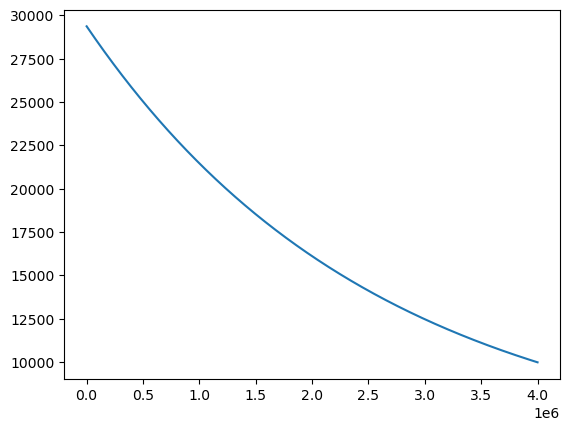

In [40]:
plt.plot(rate04_1[3])
plt.show

### 소결론5


- LEARNING_RATE02 = 0.0000001은 아직 학습률의 한계에 다다르지 않은 듯 하다. 
- 다만 더이상 반복횟수를 늘리는 것은 시간이 너무 필요하기 때문에 일단 다른 전략을 시도하기로 한다. 
- 학습률을 조정해서 0.01버전과, 0.000001 버전으로 한번더 시도해 보려 한다. 각각 에포크는 적합치를 찾아보려 한다. 

In [27]:
LEARNING_RATE05 = 0.01
LEARNING_RATE06 = 0.000001

- 모델 학습 함수는 프린트 횟수를 줄이고, 마지막 로스값을 print하는 형태로 수정한다

In [28]:
def model_learning(X, W, b, y, LEARNING_RATE, epoch):
    losses = []

    for i in range(1, epoch):
        dW, db = diab_gradient(X, W, b, y)
        W -= LEARNING_RATE * dW
        b -= LEARNING_RATE * db
        L = loss(X, W, b, y)
        losses.append(L)
        if i % 10000 == 0:
            print(f'학습률{LEARNING_RATE} epoch: {i} Loss: {round(L,4)}')
    print(f'학습률: {LEARNING_RATE}, 최종 Loss: {losses[-1]}')
    return W, b, L, losses

In [29]:
np.random.seed(2022)
W_diabetes = np.random.rand(10)
b_diabetes = np.random.rand()

print(W_diabetes)
print(b_diabetes)
# (X_diabetes_train, W_diabetes, b_diabetes, y_diabetes_train)
rate05 = model_learning(X_diabetes_train, W_diabetes, b_diabetes, y_diabetes_train, LEARNING_RATE05, epoch=40000)

[0.00935861 0.49905781 0.11338369 0.04997402 0.68540759 0.48698807
 0.89765723 0.64745207 0.89696312 0.72113493]
0.8313534207761898
학습률0.01 epoch: 10000 Loss: 3008.6007
학습률0.01 epoch: 20000 Loss: 2999.6515
학습률0.01 epoch: 30000 Loss: 2992.921
학습률: 0.01, 최종 Loss: 2987.7006834785802


<function matplotlib.pyplot.show(close=None, block=None)>

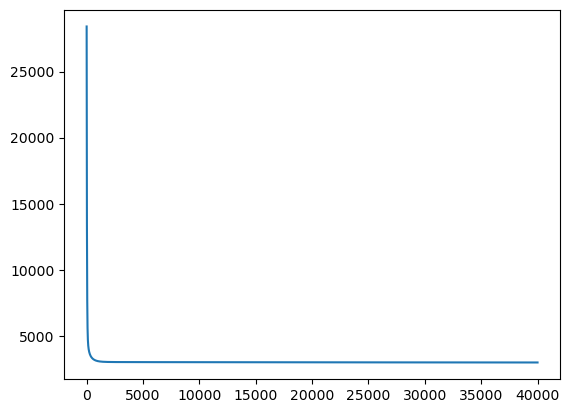

In [30]:
plt.plot(rate05[3])
plt.show

In [63]:
np.random.seed(2022)
W_diabetes = np.random.rand(10)
b_diabetes = np.random.rand()

print(W_diabetes)
print(b_diabetes)
# (X_diabetes_train, W_diabetes, b_diabetes, y_diabetes_train)
rate06 = model_learning(X_diabetes_train, W_diabetes, b_diabetes, y_diabetes_train, LEARNING_RATE06, epoch=3000000)

[0.00935861 0.49905781 0.11338369 0.04997402 0.68540759 0.48698807
 0.89765723 0.64745207 0.89696312 0.72113493]
0.8313534207761898
학습률1e-06 epoch: 10000 Loss: 28423.1219
학습률1e-06 epoch: 20000 Loss: 27522.2641
학습률1e-06 epoch: 30000 Loss: 26656.0279
학습률1e-06 epoch: 40000 Loss: 25823.0622
학습률1e-06 epoch: 50000 Loss: 25022.0688
학습률1e-06 epoch: 60000 Loss: 24251.8007
학습률1e-06 epoch: 70000 Loss: 23511.0592
학습률1e-06 epoch: 80000 Loss: 22798.6931
학습률1e-06 epoch: 90000 Loss: 22113.5959
학습률1e-06 epoch: 100000 Loss: 21454.7046
학습률1e-06 epoch: 110000 Loss: 20820.9978
학습률1e-06 epoch: 120000 Loss: 20211.494
학습률1e-06 epoch: 130000 Loss: 19625.2504
학습률1e-06 epoch: 140000 Loss: 19061.3608
학습률1e-06 epoch: 150000 Loss: 18518.9546
학습률1e-06 epoch: 160000 Loss: 17997.1953
학습률1e-06 epoch: 170000 Loss: 17495.2792
학습률1e-06 epoch: 180000 Loss: 17012.4339
학습률1e-06 epoch: 190000 Loss: 16547.9174
학습률1e-06 epoch: 200000 Loss: 16101.0167
학습률1e-06 epoch: 210000 Loss: 15671.0467
학습률1e-06 epoch: 220000 Loss: 15257.348

학습률1e-06 epoch: 2050000 Loss: 3875.072
학습률1e-06 epoch: 2060000 Loss: 3870.8248
학습률1e-06 epoch: 2070000 Loss: 3866.6161
학습률1e-06 epoch: 2080000 Loss: 3862.4453
학습률1e-06 epoch: 2090000 Loss: 3858.3116
학습률1e-06 epoch: 2100000 Loss: 3854.2145
학습률1e-06 epoch: 2110000 Loss: 3850.1534
학습률1e-06 epoch: 2120000 Loss: 3846.1276
학습률1e-06 epoch: 2130000 Loss: 3842.1366
학습률1e-06 epoch: 2140000 Loss: 3838.1798
학습률1e-06 epoch: 2150000 Loss: 3834.2567
학습률1e-06 epoch: 2160000 Loss: 3830.3668
학습률1e-06 epoch: 2170000 Loss: 3826.5094
학습률1e-06 epoch: 2180000 Loss: 3822.6842
학습률1e-06 epoch: 2190000 Loss: 3818.8906
학습률1e-06 epoch: 2200000 Loss: 3815.1281
학습률1e-06 epoch: 2210000 Loss: 3811.3963
학습률1e-06 epoch: 2220000 Loss: 3807.6946
학습률1e-06 epoch: 2230000 Loss: 3804.0228
학습률1e-06 epoch: 2240000 Loss: 3800.3803
학습률1e-06 epoch: 2250000 Loss: 3796.7666
학습률1e-06 epoch: 2260000 Loss: 3793.1815
학습률1e-06 epoch: 2270000 Loss: 3789.6244
학습률1e-06 epoch: 2280000 Loss: 3786.0951
학습률1e-06 epoch: 2290000 Loss: 3782.593
학습

<function matplotlib.pyplot.show(close=None, block=None)>

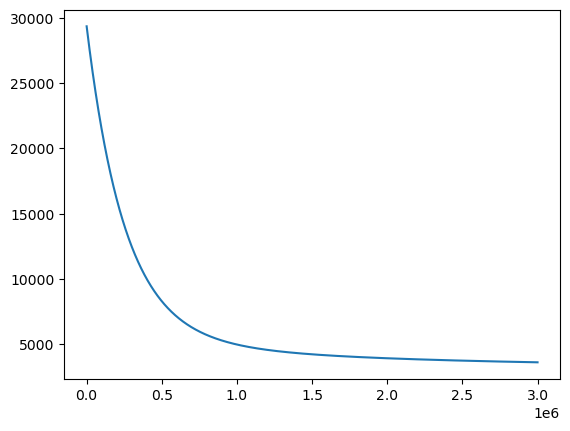

In [64]:
plt.plot(rate06[3])
plt.show

### 결론
- 학습률 0.01과 0.001이 모델만 최종 손실값 3천이하를 달성 했다. 일단 이 모델로 나머지 절차를 진행 해보려 한다. 

## (10) test 데이터에 대한 성능 확인하기  
----
- test 데이터에 대한 성능을 확인해주세요.

In [31]:
W_05, b_05, L_05, losses_05 = rate05

In [32]:
W_05

array([ -14.55420001, -216.96899633,  547.34113906,  305.34200359,
       -507.66129392,  103.28921798,   59.79815899,  277.48636682,
        656.92539396,   92.12807602])

In [33]:
b_05

150.71879340180016

In [34]:
y_diab_pred = diab_model(X_diabetes_test, W_05, b_05)
print(y_diab_pred.shape)

(111,)


In [35]:
# X_diabetes_train, X_diabetes_test, y_diabetes_train, y_diabetes_test x, w, b, y

In [36]:
rate05_loss = loss(X_diabetes_test, W_05, b_05, y_diabetes_test)
rate05_loss

2592.2251255222704

- test데이터에 대한 rate05학습 모델의 Loss값은 2592.2251255222704이다. 

## (11) 정답 데이터와 예측한 데이터 시각화하기  
----
- x축에는 X 데이터의 첫 번째 컬럼을, y축에는 정답인 target 데이터를 넣어서 모델이 예측한 데이터를 시각화해 주세요.

In [37]:
y_diab_pred

array([207.50501389,  53.84618759, 120.63878837, 197.48212676,
        86.28571303,  57.08399939, 190.61716327, 146.415799  ,
       145.28650526, 118.70829464, 188.99254354, 179.88595429,
        77.53112285, 266.16277263, 164.73538138, 179.42095829,
       165.98470837, 108.51954923, 185.63999492, 145.10230421,
       267.45231477,  75.21967547, 104.33657222, 184.06598216,
       150.73027774, 165.58625285, 205.48809492, 255.51416671,
       102.58608213, 124.04461032, 177.5352093 ,  89.61418188,
       190.98579985,  50.28078196, 115.68331527, 121.15798708,
       115.45166138, 115.83378104, 148.8137702 ,  52.94475277,
        79.05813583,  86.96796182, 119.12637973, 129.35047112,
       148.95111185, 231.3305047 , 179.06776526, 132.42009817,
       222.66752972, 115.72326259, 211.36135868, 182.35802929,
        69.04905614, 308.70332651,  73.41723441, 206.61318366,
       181.26970875,  88.99065857,  77.13722463, 176.07646329,
       123.65058806, 119.59392771,  96.5358768 , 151.67

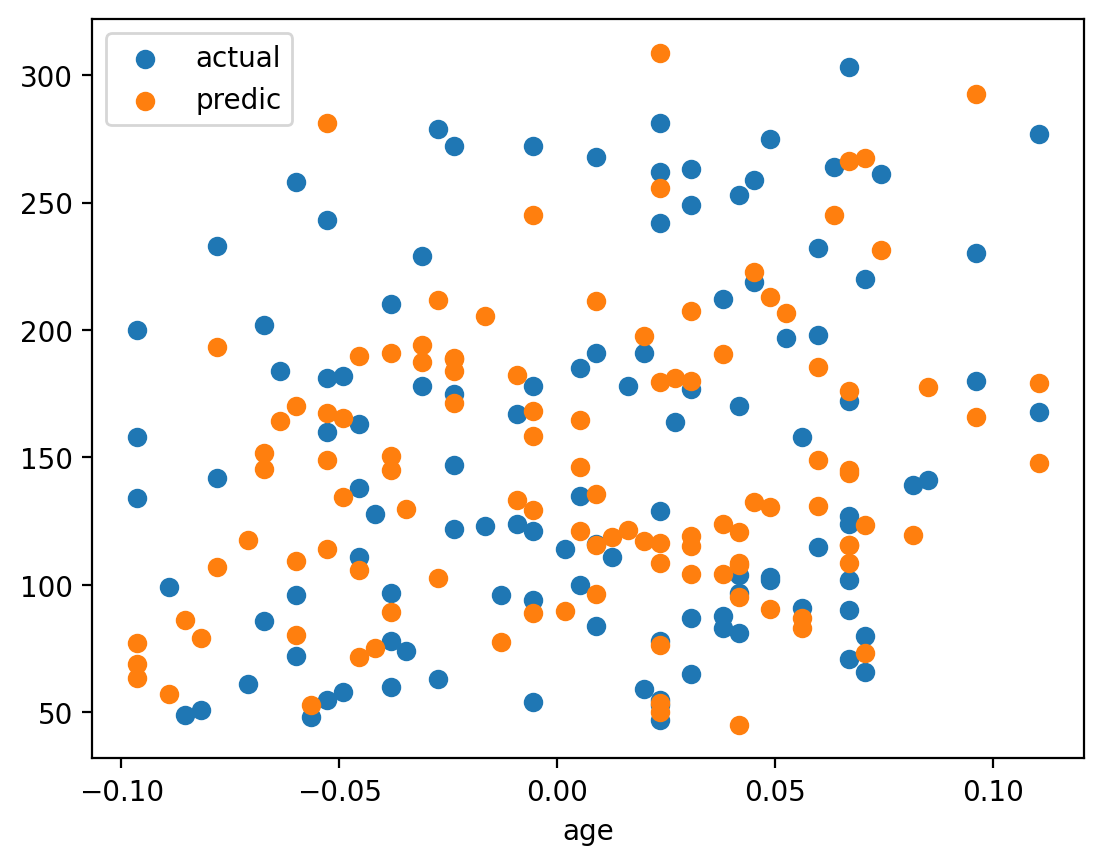

In [122]:
plt.scatter(X_diabetes_test[:, 0], y_diabetes_test, label='actual')
plt.scatter(X_diabetes_test[:, 0], y_diab_pred, label='predic')
plt.xlabel('age')
plt.legend()
plt.show()


- 왠지 당뇨에 관한 데이터는 bmi데이터와 함께 보는 것이 좋을 듯 하여 bmi와 함께 그래프를 작성해본다. 

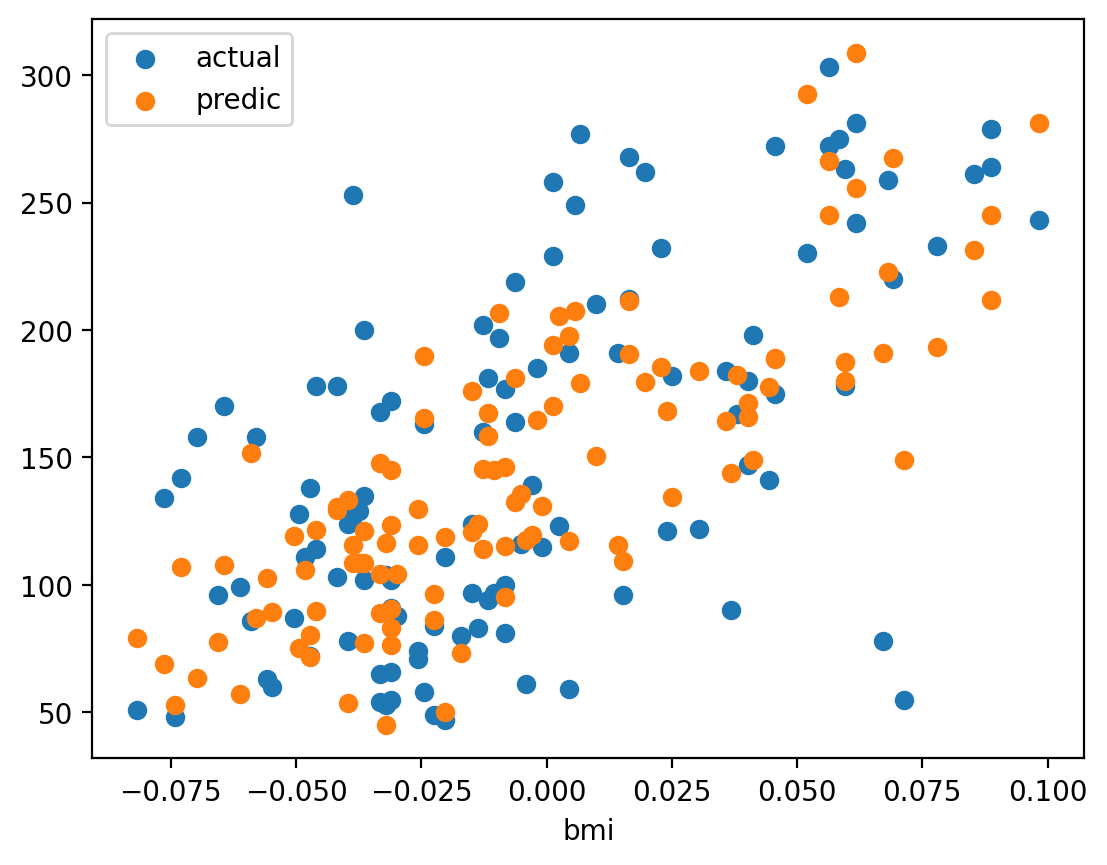

In [123]:
plt.scatter(X_diabetes_test[:, 2], y_diabetes_test, label='actual')
plt.scatter(X_diabetes_test[:, 2], y_diab_pred, label='predic')
plt.xlabel('bmi')
plt.legend()
plt.show()

### 결론
- 필요한 수준의 예측 정확토에는 도달 했다.
- 그래프상 산포도와 방향성을 보면 정확도도 어느정도 확보한듯 하다. 
- 조금더 낮은 MSE값을 만들어 보고 싶었지만 어려웠다. 

# 2-13. 프로젝트 2 : 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?  
  
자.. 드디어 오늘의 마지막 프로젝트입니다! 오늘 노드의 제목이기도 한 프로젝트네요 ㅎㅎ
마지막 프로젝트로는 보다 실용적인 데이터셋을 활용할 예정입니다. 바로 그 유명한 캐글(Kaggle) 경진대회에서 제공하는 데이터셋인데요!

데이터셋의 주제는 시간, 온도, 습도, 계절 등의 정보가 담긴 데이터를 통해 자전거의 대여량을 예측하는 문제입니다.
자전거 대여량을 결정하는 데에는 시간도 중요할 것이고, 요일이나 계절도 크게 영향을 미칠 것 같습니다.

이번 프로젝트에서는 직접 손실함수와 기울기를 계산하지 않고, 사이킷런(sklearn)의 LinearRegression 모델을 활용할 것입니다.
이 또한 위에서 진행해봤던 순서 그대로 진행하시면 됩니다!

단계는 다음과 같이 정리가 되어 있습니다. 그러면 오늘의 마지막 프로젝트, 시작해 볼까요!!! 💪🏼

In [63]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### (1) 데이터 가져오기
---

- 터미널에서 ~/data/data/bike-sharing-demand 경로에 train.csv 데이터를 train 변수로 가져 옵니다.  
- [여기](https://www.kaggle.com/c/bike-sharing-demand/data)에서 데이터를 상세히 확인할 수 있습니다.  

In [52]:
train = pd.read_csv('train.csv')

In [53]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [54]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [55]:
train_date = train.copy()

In [56]:
train_date

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


### (2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기
----
- to_datetime 활용 : [링크](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html#pandas.to_datetime) 참조
- pandas datetime extract year month day 키워드로 검색해 보기

In [57]:
train_date['datetime'] = pd.to_datetime(train_date['datetime'])
train_date.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [58]:
train_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [59]:
train_date['year'] = train_date['datetime'].dt.year
train_date['month'] = train_date['datetime'].dt.month
train_date['day'] = train_date['datetime'].dt.day
train_date['hour'] = train_date['datetime'].dt.hour
train_date['minute'] = train_date['datetime'].dt.minute
train_date['second'] = train_date['datetime'].dt.second

In [61]:
train_date.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


In [84]:
train_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  day         10886 non-null  int64         
 15  hour        10886 non-null  int64         
 16  minute      10886 non-

### (3) year, month, day, hour, minute, second 데이터 개수 시각화하기  
---
- sns.countplot 활용해서 시각화하기
- subplot을 활용해서 한 번에 6개의 그래프 함께 시각화하기

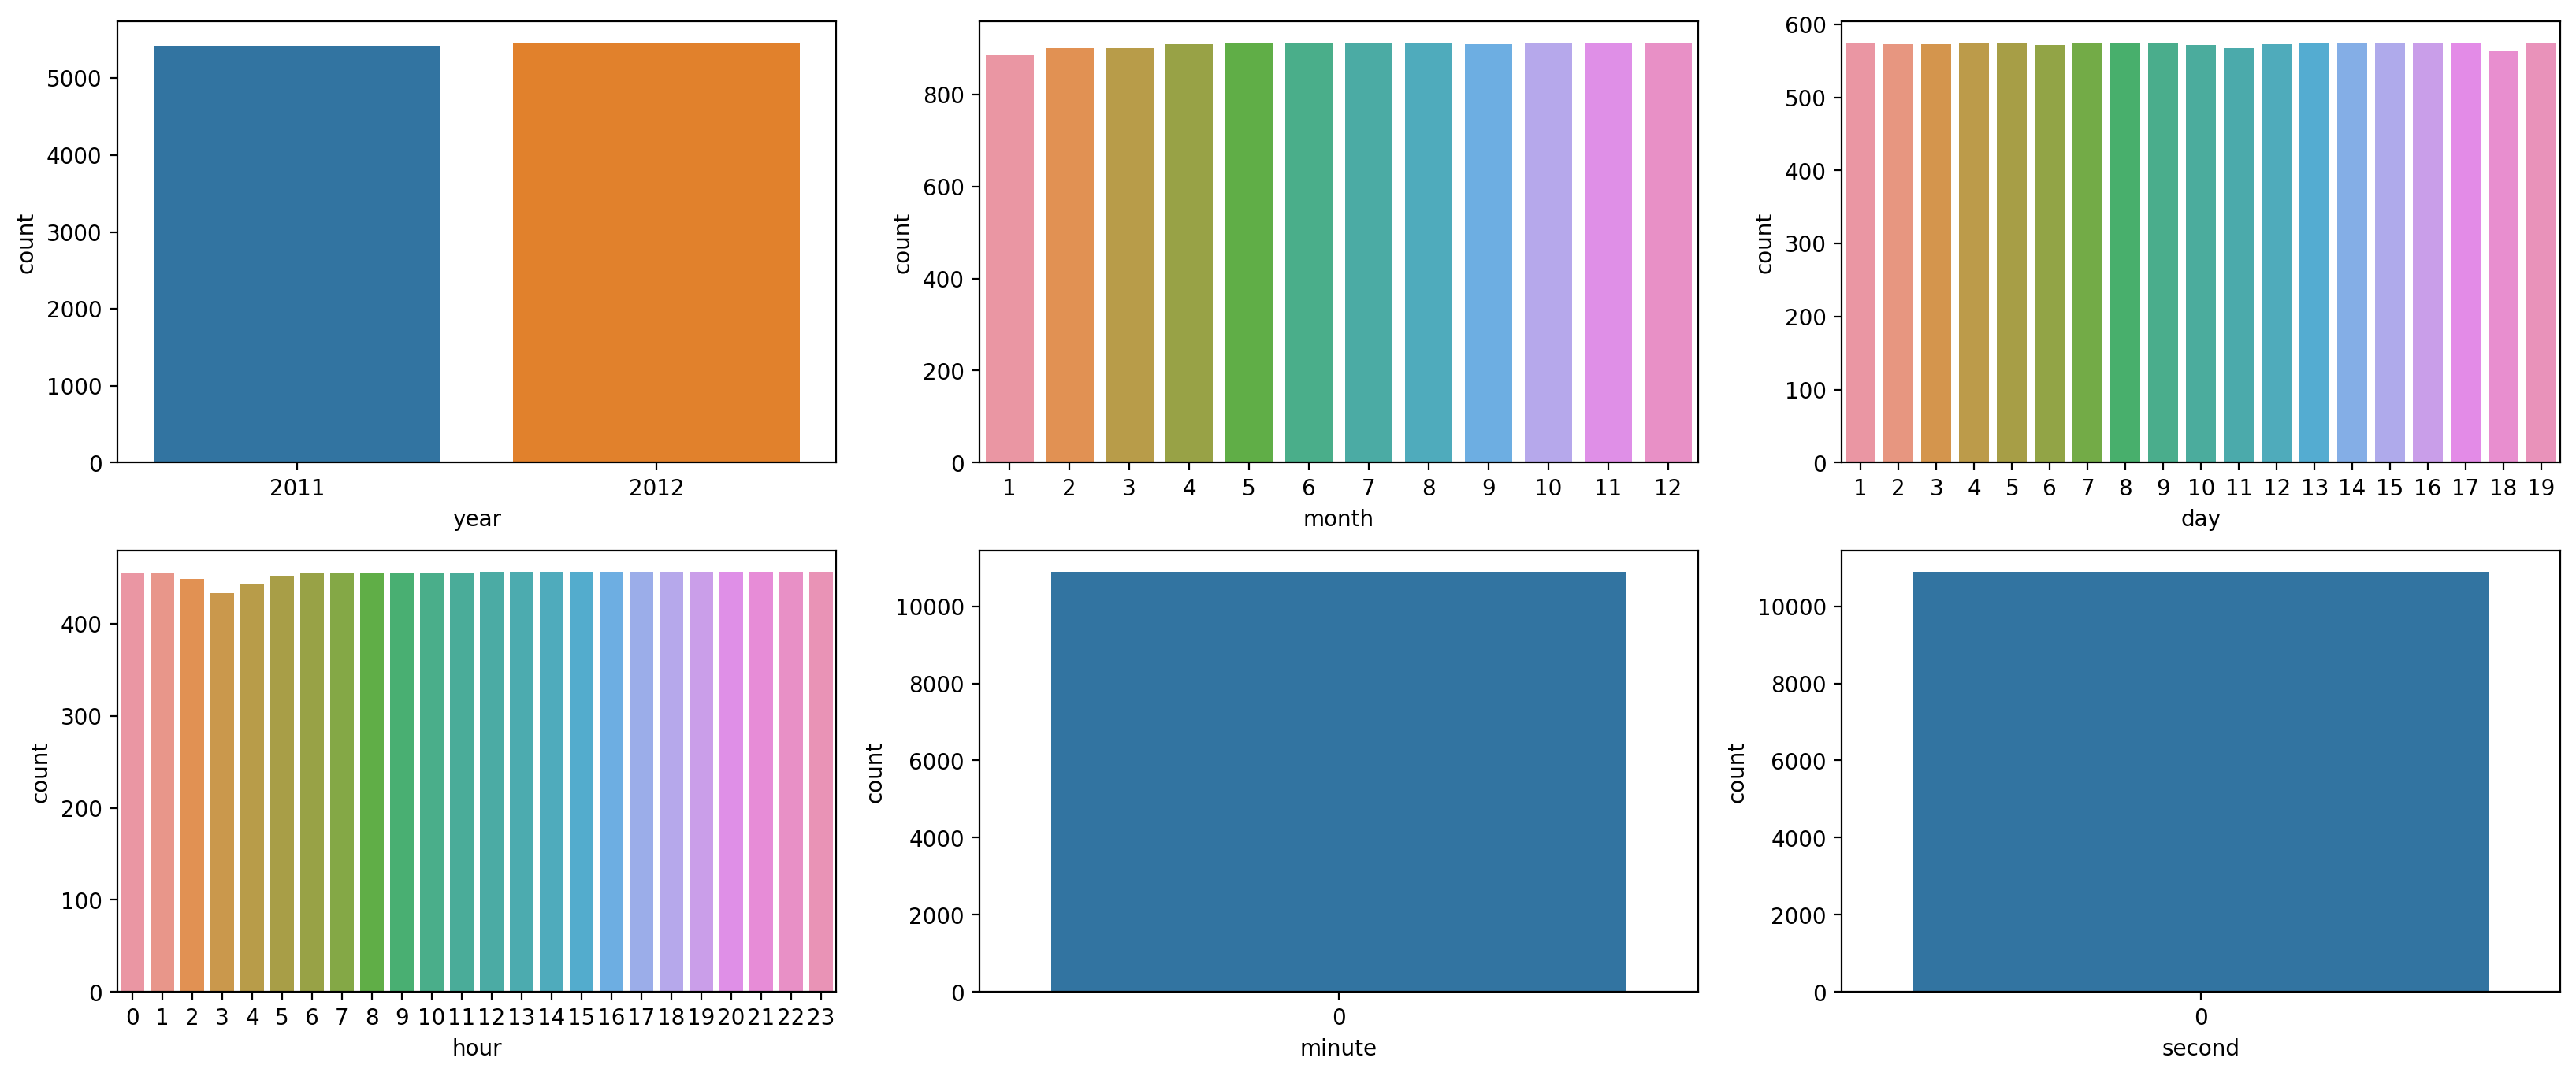

In [99]:
plt.figure(figsize=(20, 8))

plt.subplot(231)
sns.countplot(data=train_date, x='year')

plt.subplot(232)
sns.countplot(data=train_date, x='month')

plt.subplot(233)
sns.countplot(data=train_date, x='day')

plt.subplot(234)
sns.countplot(data=train_date, x='hour')

plt.subplot(235)
sns.countplot(data=train_date, x='minute')

plt.subplot(236)
sns.countplot(data=train_date, x='second')

plt.show()

### (4) X, y 컬럼 선택 및 train/test 데이터 분리
----
- X(feature) 에는 어떤 데이터 컬럼을 넣어야 될지 고민해 봅시다 데이터 컬럼을 추가하거나 빼면서 잘 조합하여 데이터를 넣기 바랍니다. 만일 모든 데이터 컬럼(특징)을 넣는다면 오차 값이 말도 안 되게 적게 나올 수도 있습니다. ex) count를 예측하는데 casual,registered 컬럼이 필요할까요?

- count 값을 맞추고자 하므로, y 변수에 count 컬럼의 데이터 넣기

In [103]:
y_bike = train_date['count']
print(y)

0         16
1         40
2         32
3         13
4          1
        ... 
10881    336
10882    241
10883    168
10884    129
10885     88
Name: count, Length: 10886, dtype: int64


- X의 feature를 선택해야 한다. 
- 제일먼저 결과를 예상하는데 연관이 없는 casual, registered를 제외한다. 
- 두번째 온도도 temp만 남기고 atemp는 삭제한다. 
- 세번째 일시 데이터에서 minute과 second는 모두 값이 0이므로 제외한다. 
- 언뜻 year도 큰 연관이 없어보이지만 날짜에 대한 feature로써 year는 의미가 있다고 판단했다.

In [104]:
X_bike = train_date.copy()
# del X[['casual', 'registered', 'atemp', 'minute', 'second']]
X_bike.drop(['datetime', 'casual', 'registered', 'atemp', 'minute', 'second', 'count'], axis=1, inplace=True)
X_bike

,season,holiday,workingday,weather,temp,humidity,windspeed,year,month,day,hour
0,1,0,0,1,9.84,81,0.0000,2011,1,1,0
1,1,0,0,1,9.02,80,0.0000,2011,1,1,1
2,1,0,0,1,9.02,80,0.0000,2011,1,1,2
3,1,0,0,1,9.84,75,0.0000,2011,1,1,3
4,1,0,0,1,9.84,75,0.0000,2011,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,50,26.0027,2012,12,19,19
10882,4,0,1,1,14.76,57,15.0013,2012,12,19,20
10883,4,0,1,1,13.94,61,15.0013,2012,12,19,21
10884,4,0,1,1,13.94,61,6.0032,2012,12,19,22


In [105]:
print(X_bike.shape)
print(y_bike.shape)

(10886, 11)
(10886,)


In [106]:
X_bike_train, X_bike_test, y_bike_train, y_bike_test = train_test_split(X_bike, y_bike, test_size=0.25, random_state=2022)

print(X_bike_train.shape, y_bike_train.shape)
print(X_bike_test.shape, y_bike_test.shape)

(8164, 11) (8164,)
(2722, 11) (2722,)


### (5) LinearRegression 모델 학습
----
- sklearn의 LinearRegression 모델 불러오기 및 학습하기

In [107]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()

In [108]:
linear_model.fit(X_bike_train, y_bike_train)

LinearRegression()

### (6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산
----
- 학습된 모델에 X_test를 입력해서 예측값 출력하기
- 모델이 예측한 값과 정답 target 간의 손실함수 값 계산하기
- mse 값과 함께 rmse 값도 계산하기

In [109]:
y_bike_pred = linear_model.predict(X_bike_test)

In [110]:
def MSE_loss(a, b):
    mse = ((a - b) ** 2).mean()
    return mse

def RMSE_loss(a, b):
    return (MSE_loss(a, b)) ** 0.5

In [111]:
mse = MSE_loss(y_bike_pred, y_bike_test)
mse

19670.893679651308

In [112]:
rmse = RMSE_loss(y_bike_pred, y_bike_test)
rmse

140.25296317601033

### 소결론
- mse는 19670, rmse는 140이 나왔다. 

### (7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기
---
- x축에 X 데이터 중 temp 데이터를, y축에는 count 데이터를 넣어서 시각화하기
- x축에 X 데이터 중 humidity 데이터를, y축에는 count 데이터를 넣어서 시각화하기

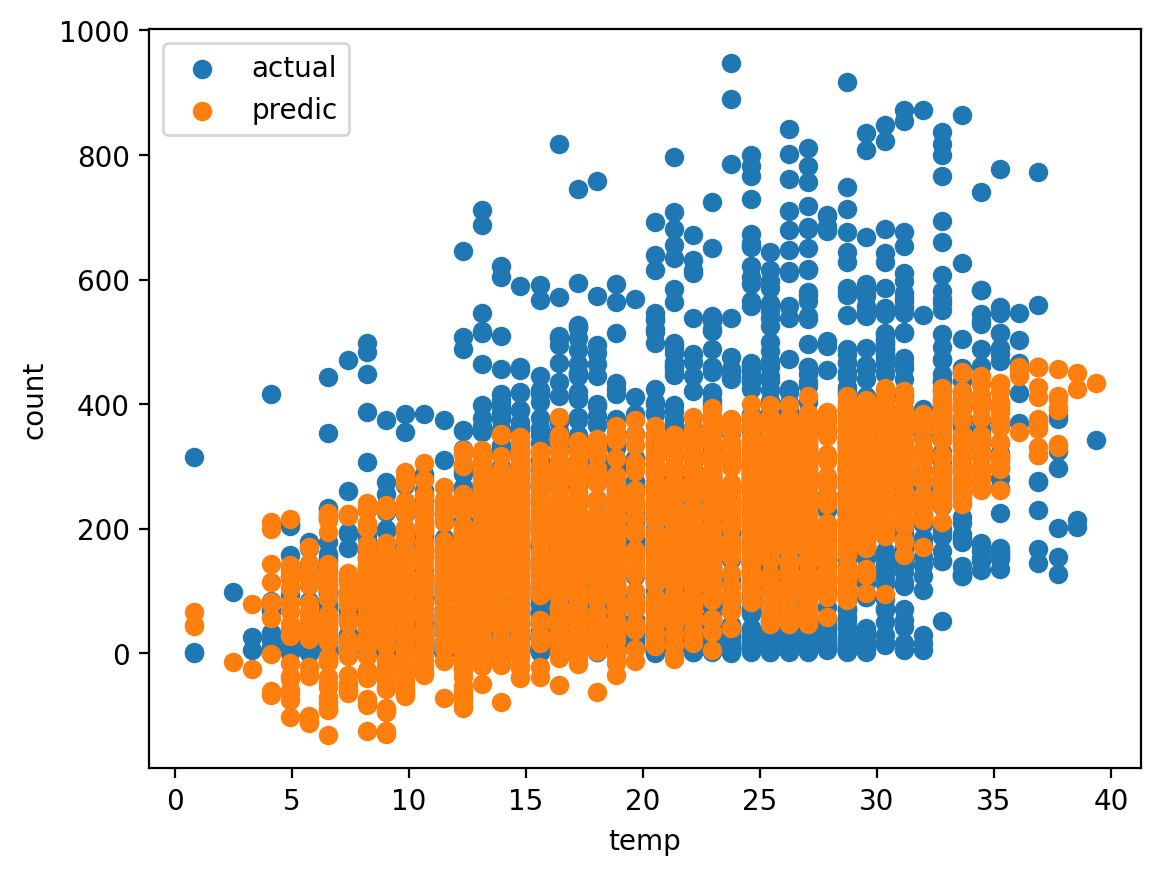

In [119]:
plt.scatter(X_bike_test['temp'], y_bike_test, label='actual')
plt.scatter(X_bike_test['temp'], y_bike_pred, label='predic')
plt.xlabel('temp')
plt.ylabel('count')
plt.legend()
plt.show()

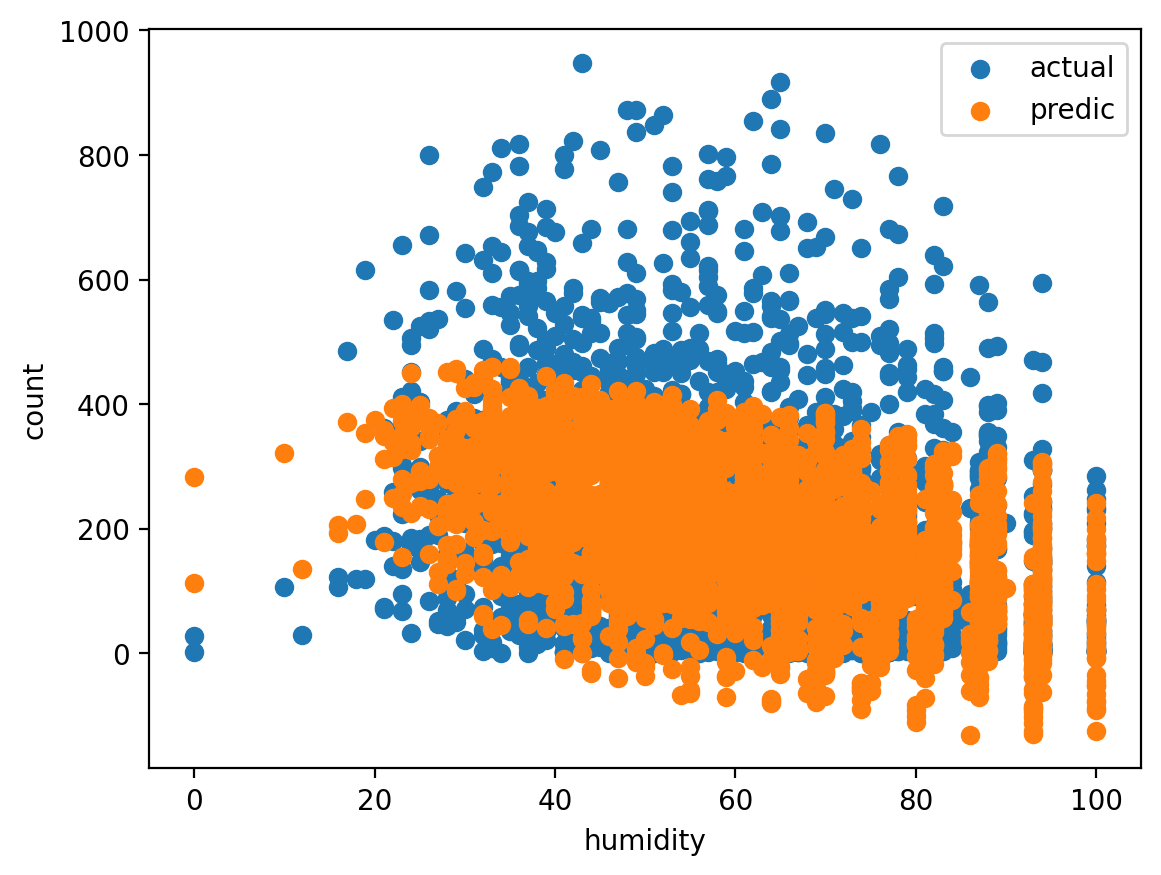

In [121]:
plt.scatter(X_bike_test['humidity'], y_bike_test, label='actual')
plt.scatter(X_bike_test['humidity'], y_bike_pred, label='predic')
plt.xlabel('humidity')
plt.ylabel('count')
plt.legend()
plt.show()

# 회고

### 신경쓴점
- 변수명을 혼란이 없도록 일정 패턴에 따라 정했음
- 시각화 할때 되도록 범례와 라벨을 붙일 수 있도록 노력했음

### 아쉬운점
- bike모델 훈련에서 데이터를 정규화 했으면 조금더 정확안 예측이 가능 했겠지만 시간이 부족해 정규화는 시도하지 못했음
- 학습률을 좀더 다양하게 해서 실험해보고 싶었으나 그러지 못했음

### 개선하고 싶은점
- 학습의 횟수가 많아질 수록 시간이 걸렸기 때문에 멀티프로세싱을 도입하려 했으나 주피터노트북에서는 오류가 발생해서 제대로 시도해보지 못했음
- 제대로 세팅해서 멀티프로세싱을 도입하고 싶음
- 조금더 다양한 시각화 시도를 해보고 싶음

# Reference
- https://zephyrus1111.tistory.com/48
- https://dsbook.tistory.com/52
- https://codetorial.net/matplotlib/set_legend.html
- https://sarah0518.tistory.com/61
- https://blog.naver.com/rising_n_falling/221631637822
- LMS